# Data Analysis Project using Netflix Data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankulsharma150/netflix-data-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Paul\.cache\kagglehub\datasets\ankulsharma150\netflix-data-analysis\versions\1


## Exploring the data

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
files = os.listdir(path)
print("Files in dataset:")
for file in files:
    print(file)

Files in dataset:
netflix_movies (1).csv


In [4]:
file_path = os.path.join(path, "netflix_movies (1).csv")

df = pd.read_csv(file_path)
print(df.shape)
print(df.head())

(8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2

In [5]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [6]:
# Checking for missing values
print(df.isnull().sum())
print(df.dtypes)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [7]:
# Exploring the data
print(df.describe())
print(df['type'].value_counts())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [8]:
print(df['rating'].value_counts())

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [9]:
print(df['country'].value_counts().head(10))

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [10]:
print(df['listed_in'].value_counts().head(10))

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


In [11]:
print(df.groupby('type')['release_year'].describe())

          count         mean       std     min     25%     50%     75%     max
type                                                                          
Movie    6131.0  2013.121514  9.678169  1942.0  2012.0  2016.0  2018.0  2021.0
TV Show  2676.0  2016.605755  5.740138  1925.0  2016.0  2018.0  2020.0  2021.0


In [12]:
print(df['date_added'].value_counts().head(10))

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
October 1, 2019       60
July 1, 2021          60
November 1, 2018      60
September 1, 2021     56
July 1, 2019          52
Name: count, dtype: int64


In [13]:
# What are the longest and shortest titles
print("Longest titles")
print(df['title'].str.len().nlargest(5))
print("\nShortest titles")
print(df['title'].str.len().nsmallest(5))

Longest titles
5164    104
2813     93
3240     88
8462     88
4851     83
Name: title, dtype: int64

Shortest titles
2069    1
5958    1
7155    1
7687    1
2127    2
Name: title, dtype: int64


In [14]:
# See some short and long titles
df['title_length'] = df['title'].str.len()

print("Examples of long titles")
print(df.nlargest(5, 'title_length')[['title', 'title_length']])
print("\nExamples of short titles")
print(df.nsmallest(5, 'title_length')[['title', 'title_length']])

Examples of long titles
                                                  title  title_length
5164  Jim & Andy: The Great Beyond - Featuring a Ver...           104
2813  Ken Burns Presents: College Behind Bars: A Fil...            93
3240  Mike Birbiglia: What I Should Have Said Was No...            88
8462  The Power of Grayskull: The Definitive History...            88
4851  Steve Martin and Martin Short: An Evening You ...            83

Examples of short titles
     title  title_length
2069     H             1
5958     9             1
7155     K             1
7687     P             1
2127    3%             2


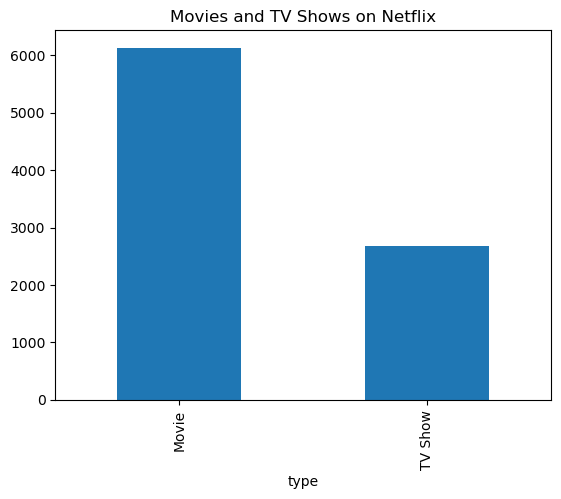

In [15]:
# Visualizing the data
import matplotlib.pyplot as plt

df['type'].value_counts().plot(kind='bar')
plt.title("Movies and TV Shows on Netflix")
plt.show()

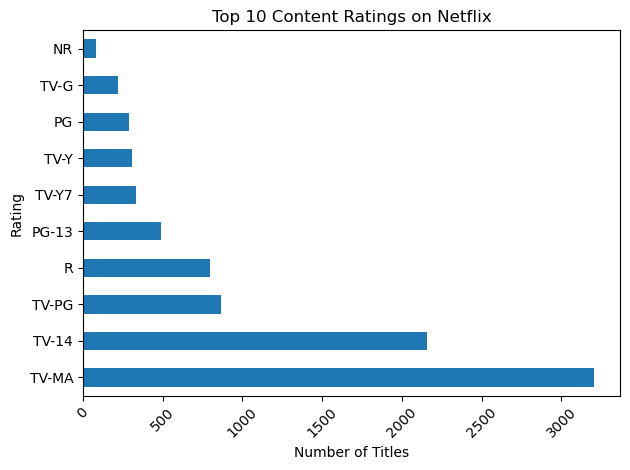

In [16]:
df['rating'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Content Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

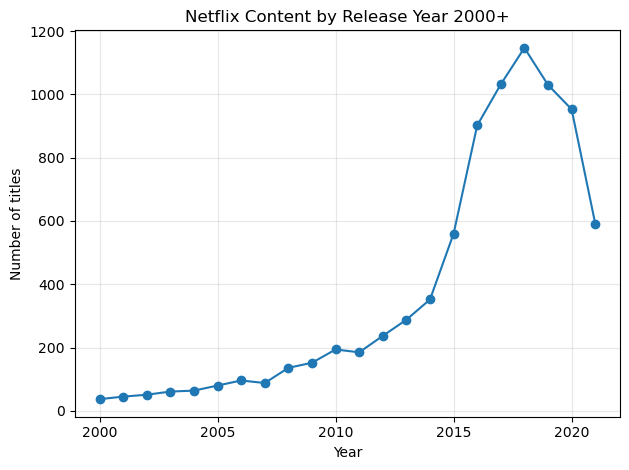

In [17]:
# Exploring time data
recent_content = df[df['release_year'] >= 2000]
recent_content['release_year'].value_counts().sort_index().plot(kind='line', marker = 'o')
plt.title("Netflix Content by Release Year 2000+")
plt.xlabel("Year")
plt.ylabel("Number of titles")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

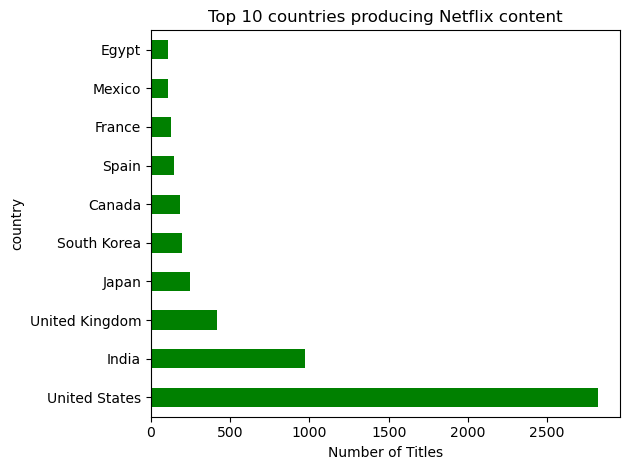

In [18]:
df['country'].value_counts().head(10).plot(kind='barh', color='green')
plt.title("Top 10 countries producing Netflix content")
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.show()

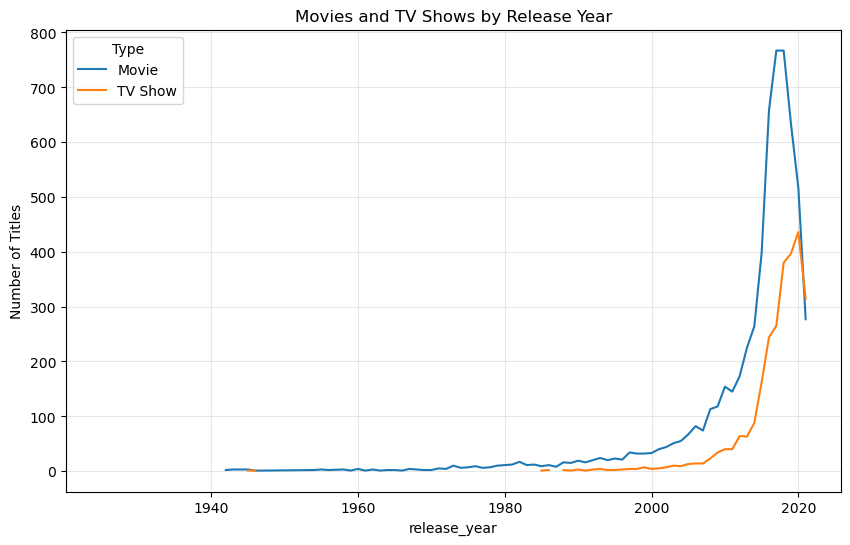

In [19]:
df.groupby(['release_year', 'type']).size().unstack().plot(kind='line', figsize=(10,6))
plt.title('Movies and TV Shows by Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.grid(True, alpha=0.3)
plt.show()

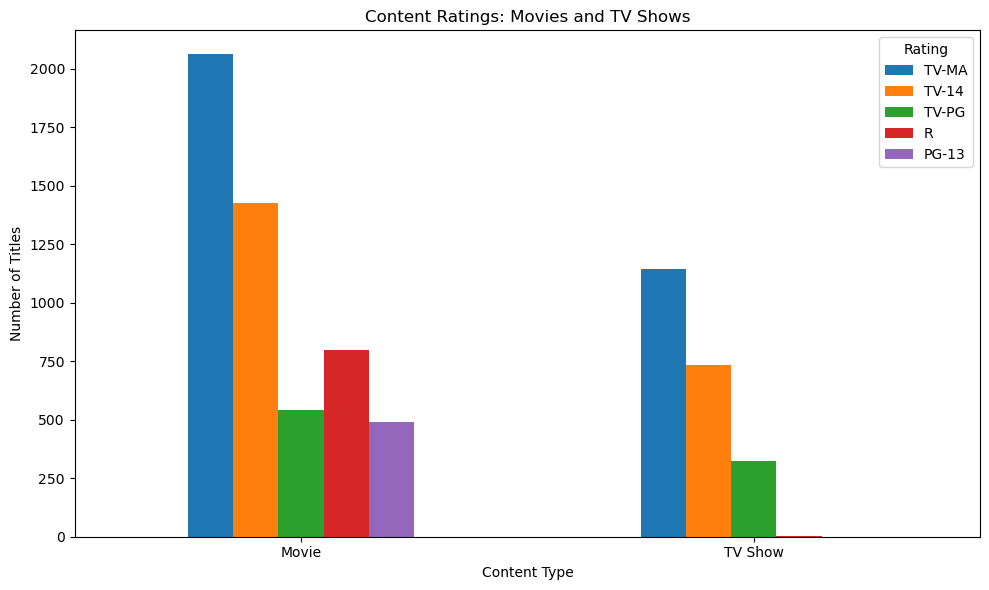

In [20]:
# Exploring multiple insights in one analysis
rating_by_type = pd.crosstab(df['type'], df['rating'])
rating_by_type[['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13']].plot(kind='bar', figsize = (10, 6))
plt.title('Content Ratings: Movies and TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.legend(title='Rating')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

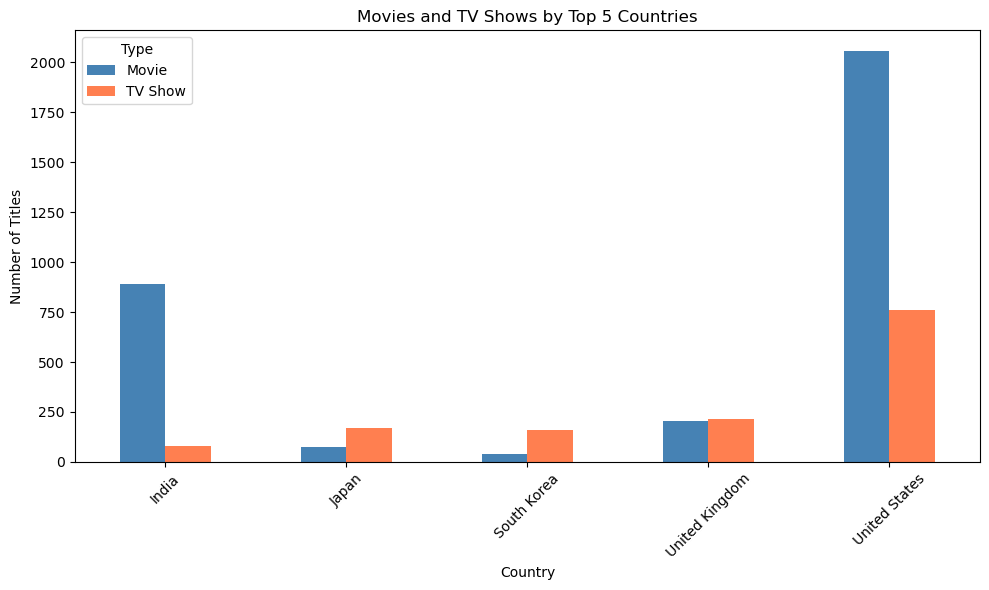

In [21]:
# What kind of content the top 5 producing countries make
top_countries = df['country'].value_counts().head(5).index
filtered_df = df[df['country'].isin(top_countries)]

country_type = pd.crosstab(filtered_df['country'], filtered_df['type'])
country_type.plot(kind='bar', figsize = (10, 6), color=['steelblue', 'coral'])
plt.title('Movies and TV Shows by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

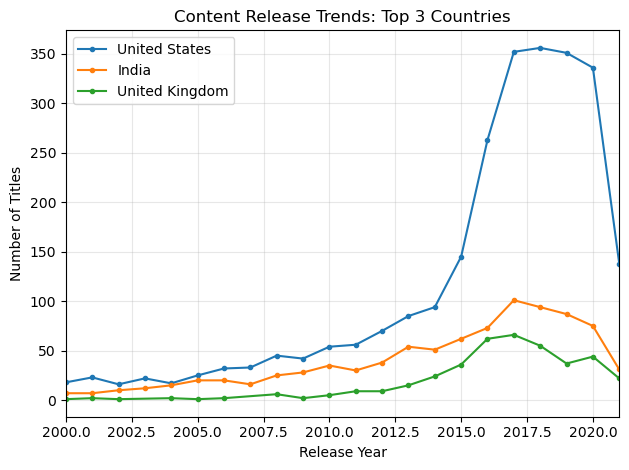

In [22]:
# See how content in the UK, India and the United States has evolved over time
top_3 = ['United States', 'India', 'United Kingdom']
for country in top_3:
    country_data = df[df['country'] == country]
    country_data['release_year'].value_counts().sort_index().plot(label=country, marker='.')

plt.title('Content Release Trends: Top 3 Countries')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(2000, 2021)
plt.tight_layout()
plt.show()

C:\Users\Paul\AppData\Local\Temp\ipykernel_12724\2227038575.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)


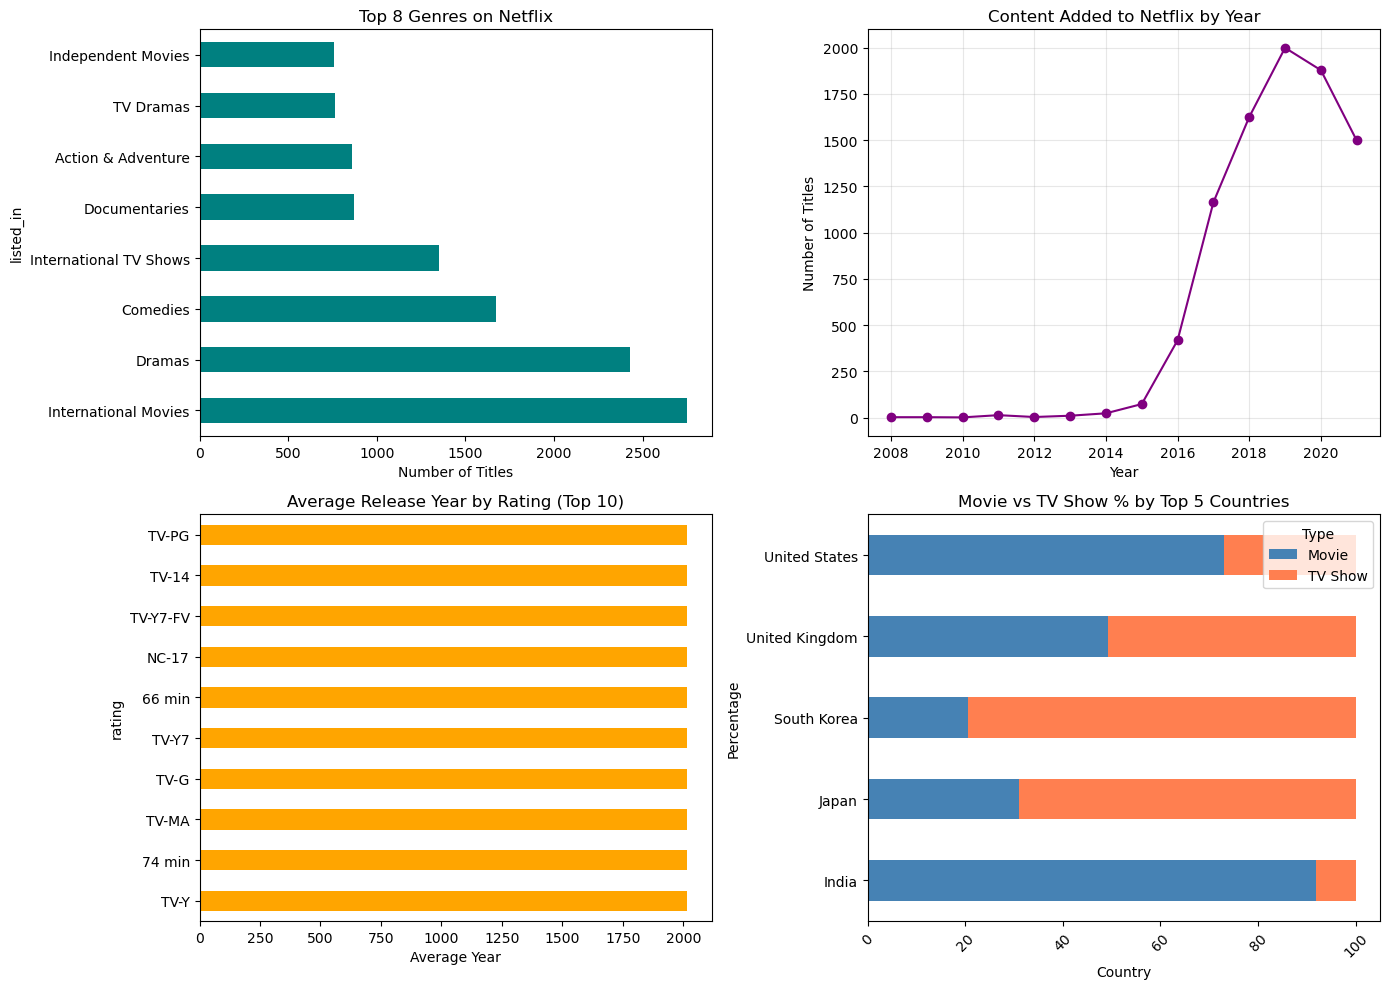

In [23]:
# How different genres have evolved over time
fig, axes = plt.subplots(2, 2, figsize = (14,10))

# Top genres overall
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(8)
top_genres.plot(kind = 'barh', ax = axes[0,0], color = 'teal')
axes[0,0].set_title('Top 8 Genres on Netflix')
axes[0,0].set_xlabel('Number of Titles')

# Content added by year
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
yearly_additions = df['year_added'].value_counts().sort_index()
yearly_additions.plot(kind = 'line', ax = axes[0,1], marker = 'o', color='purple')
axes[0,1].set_title('Content Added to Netflix by Year')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Number of Titles')
axes[0,1].grid(True, alpha=0.3)

# Average release year by rating
avg_year_by_rating = df.groupby('rating')['release_year'].mean().sort_values(ascending=False).head(10)
avg_year_by_rating.plot(kind = 'barh', ax = axes[1,0], color='orange')
axes[1,0].set_title('Average Release Year by Rating (Top 10)')
axes[1,0].set_xlabel('Average Year')

# Content type distribution by top 5 countries
top_5_countries = df['country'].value_counts().head(5).index
country_type_pct = df[df['country'].isin(top_5_countries)].groupby(['country', 'type']).size().unstack()
country_type_pct_normalized = country_type_pct.div(country_type_pct.sum(axis = 1), axis = 0)*100
country_type_pct_normalized.plot(kind='barh', stacked=True, ax = axes[1,1], color=['steelblue', 'coral'])
axes[1,1].set_title('Movie vs TV Show % by Top 5 Countries')
axes[1,1].set_xlabel('Country')
axes[1,1].set_ylabel('Percentage')
axes[1,1].legend(title='Type')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Paul\AppData\Local\Temp\ipykernel_12724\2360371633.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


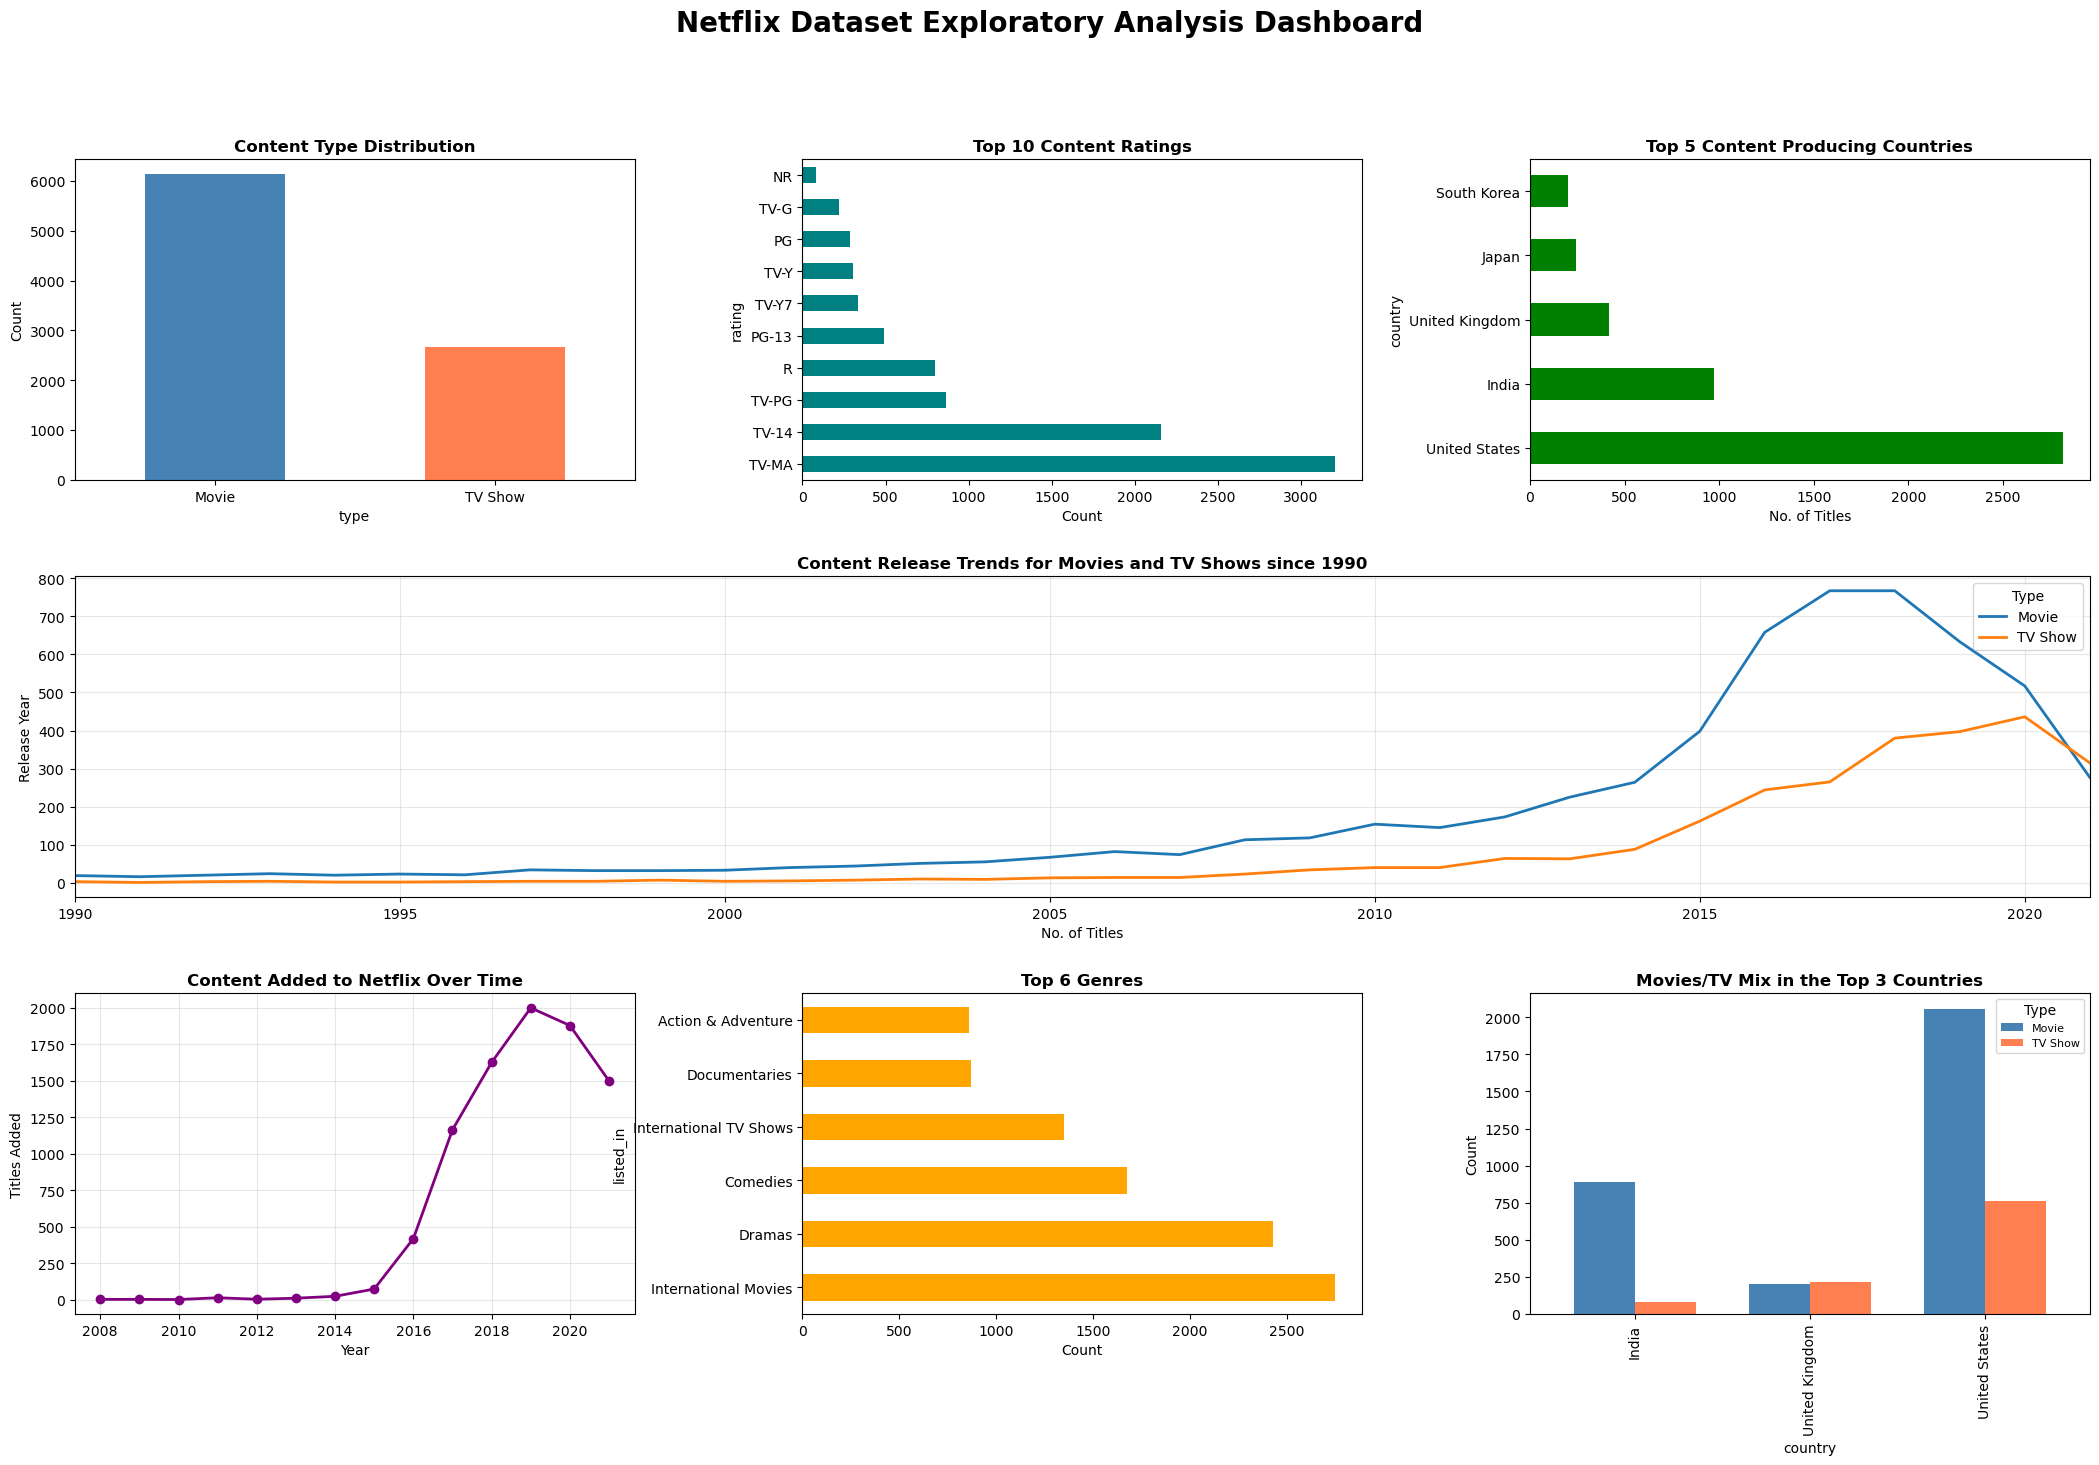


------------------------------------------------------------
Netflix Dataset Summary Stats
------------------------------------------------------------
Total Titles: 8,807
Movies: 6,131(69.6)%
TV Shows: 2,676(30.4)%

Release Year Range: 1925 - 2021
Average Release Year: 2014

Top Rating: TV-MA (3,207 titles)
Top Country: United States (2,818 titles)

Missing Data:
- Director: 2,634 (29.9%)
- Cast: 825 (9.4%)
- Country: 831 (9.4%)
------------------------------------------------------------


In [24]:
# Exploratory data analysis dashboard
fig = plt.figure(figsize = (26,15))
fig.suptitle('Netflix Dataset Exploratory Analysis Dashboard', fontsize=20, fontweight='bold', y=.98)

# Grid layout
gs = fig.add_gridspec(3,3, hspace=.3, wspace=.3)

# Movies v TV Shows (top left of grid)
ax1 = fig.add_subplot(gs[0, 0])
df['type'].value_counts().plot(kind='bar', ax = ax1, color = ['steelblue', 'coral'])
ax1.set_title('Content Type Distribution', fontweight='bold')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Top 10 Ratings (top middle of grid)
ax2 = fig.add_subplot(gs[0, 1])
df['rating'].value_counts().head(10).plot(kind='barh', ax=ax2, color='teal')
ax2.set_title('Top 10 Content Ratings', fontweight='bold')
ax2.set_xlabel('Count')

# Top 5 Countries by production volume (top right of grid)
ax3 = fig.add_subplot(gs[0, 2])
df['country'].value_counts().head(5).plot(kind='barh', ax=ax3, color='green')
ax3.set_title('Top 5 Content Producing Countries', fontweight='bold')
ax3.set_xlabel('No. of Titles')

# Release year trends (middle of grid, span)
ax4 = fig.add_subplot(gs[1, :])
df.groupby(['release_year', 'type']).size().unstack().plot(ax=ax4, linewidth=2)
ax4.set_title('Content Release Trends for Movies and TV Shows since 1990', fontweight='bold')
ax4.set_ylabel('Release Year')
ax4.set_xlabel('No. of Titles')
ax4.legend(title='Type')
ax4.grid(True, alpha=.3)
ax4.set_xlim(1990, 2021)

# Content added over time (bottom left of grid)
ax5 = fig.add_subplot(gs[2, 0])
yearly_additions.plot(kind='line', ax=ax5, marker='o', color='purple', linewidth=2)
ax5.set_title('Content Added to Netflix Over Time', fontweight='bold')
ax5.set_ylabel('Titles Added')
ax5.set_xlabel('Year')
ax5.grid(True, alpha=.3)

# Top 6 Genres (bottom middle of grid)
ax6 = fig.add_subplot(gs[2, 1])
top_genres_dash = df['listed_in'].str.split(', ').explode().value_counts().head(6)
top_genres_dash.plot(kind='barh', ax=ax6, color='orange')
ax6.set_title('Top 6 Genres', fontweight='bold')
ax6.set_xlabel('Count')

# Content Mix by Top 3 Countries (bottom right of grid)
ax7 = fig.add_subplot(gs[2, 2])
top_3_countries = ['United States', 'India', 'United Kingdom']
country_mix = df[df['country'].isin(top_3_countries)].groupby(['country', 'type']).size().unstack()
country_mix.plot(kind='bar', ax=ax7, color=['steelblue', 'coral'], width=.7)
ax7.set_title('Movies/TV Mix in the Top 3 Countries', fontweight='bold')
ax7.set_ylabel('Count')
ax7.legend(title='Type', fontsize=8)

plt.tight_layout()
plt.show()

print("\n" + "-"*60)
print('Netflix Dataset Summary Stats')
print("-"*60)
print(f"Total Titles: {len(df):,}")
print(f"Movies: {len(df[df['type']=='Movie']):,}({len(df[df['type']=='Movie'])/len(df)*100:.1f})%")
print(f"TV Shows: {len(df[df['type']=='TV Show']):,}({len(df[df['type']=='TV Show'])/len(df)*100:.1f})%")
print(f"\nRelease Year Range: {df['release_year'].min()} - {df['release_year'].max()}")
print(f"Average Release Year: {df['release_year'].mean():.0f}")
print(f"\nTop Rating: {df['rating'].value_counts().index[0]} ({df['rating'].value_counts().values[0]:,} titles)")
print(f"Top Country: {df['country'].value_counts().index[0]} ({df['country'].value_counts().values[0]:,} titles)")
print(f"\nMissing Data:")
print(f"- Director: {df['director'].isnull().sum():,} ({df['director'].isnull().sum()/len(df)*100:.1f}%)")
print(f"- Cast: {df['cast'].isnull().sum():,} ({df['cast'].isnull().sum()/len(df)*100:.1f}%)")
print(f"- Country: {df['country'].isnull().sum():,} ({df['country'].isnull().sum()/len(df)*100:.1f}%)")
print('-'*60)

## Data Storytelling

### Perspective 1: Netflix Customer

**Question 1: "What are the hidden gems on Netflix that I might not discover through the algorithm?"**

In [25]:
# Extracting relevant columns
gems_df = df[['title', 'type', 'country', 'release_year', 'listed_in', 'date_added']]

# Overview of the data subset
print(f"Selected columns shape: {gems_df.shape}")
print("Missing values:")
print(gems_df.isnull().sum())
print("First few records:")
print(gems_df.head())

Selected columns shape: (8807, 6)
Missing values:
title             0
type              0
country         831
release_year      0
listed_in         0
date_added       10
dtype: int64
First few records:
                   title     type        country  release_year  \
0   Dick Johnson Is Dead    Movie  United States          2020   
1          Blood & Water  TV Show   South Africa          2021   
2              Ganglands  TV Show            NaN          2021   
3  Jailbirds New Orleans  TV Show            NaN          2021   
4           Kota Factory  TV Show          India          2021   

                                           listed_in          date_added  
0                                      Documentaries  September 25, 2021  
1    International TV Shows, TV Dramas, TV Mysteries  September 24, 2021  
2  Crime TV Shows, International TV Shows, TV Act...  September 24, 2021  
3                             Docuseries, Reality TV  September 24, 2021  
4  International TV Shows,

In [26]:
# Noting values that will be removed
print('Titles with missing country entries:')
print(gems_df[gems_df['country'].isnull()][['title', 'type', 'release_year']])
print(f"\nDropping {gems_df['country'].isnull().sum()} rows and keeping {len(gems_df) - gems_df['country'].isnull().sum()} rows.")

gems_df_clean = gems_df.dropna(subset=['country']).copy()
gems_df_clean = gems_df_clean.dropna(subset=['date_added']).copy()

print(f"Cleaned hidden gems dataset shape: {gems_df_clean.shape}")
print(f"Remaining missing values: {gems_df_clean.isnull().sum()}")

Titles with missing country entries:
                                    title     type  release_year
2                               Ganglands  TV Show          2021
3                   Jailbirds New Orleans  TV Show          2021
5                           Midnight Mass  TV Show          2021
6        My Little Pony: A New Generation    Movie          2021
10    Vendetta: Truth, Lies and The Mafia  TV Show          2021
...                                   ...      ...           ...
8718               Westside vs. the World    Movie          2019
8759               World's Weirdest Homes    Movie          2015
8783                                 Yoko  TV Show          2016
8785                                  YOM  TV Show          2016
8803                          Zombie Dumb  TV Show          2018

[831 rows x 3 columns]

Dropping 831 rows and keeping 7976 rows.
Cleaned hidden gems dataset shape: (7967, 6)
Remaining missing values: title           0
type            0
country   

We'll define hidden gems in two ways:
* Titles in the US market from pre-2000 from prestigious genres (Drama, Documentary, Independent, Classic)
* Titles from international markets outside of the big hitters (UK, India, Japan, S. Korea), genre-independent

In [27]:
# US Market hidden gems
us_old = gems_df_clean[(gems_df_clean['country'].str.contains('United States', na=False)) & 
                        (gems_df_clean['release_year'] < 2000)].copy()

print(f"Volume of US content from before 2000: {len(us_old)}")
print(f"Release year range: {us_old['release_year'].min()} - {us_old['release_year'].max()}")
print(f"Count of content types:\n {us_old['type'].value_counts()}")

# Target genre subset 
target_genres = ['Drama', 'Documentary', 'Classic','Independent', 'Cult']
us_old['genre_match'] = us_old['listed_in'].apply(lambda x: any(genre in x for genre in target_genres))

us_gems = us_old[us_old['genre_match']].copy()

print(f"\nNumber of US gems with desired genres: {len(us_gems)}")
print(f"\nSample titles:")
print(us_gems[['title', 'release_year', 'listed_in']].head())

Volume of US content from before 2000: 303
Release year range: 1942 - 1999
Count of content types:
 type
Movie      271
TV Show     32
Name: count, dtype: int64

Number of US gems with desired genres: 170

Sample titles:
                           title  release_year  \
7                        Sankofa          1993   
41                          Jaws          1975   
42                        Jaws 2          1978   
131  Blade Runner: The Final Cut          1982   
134     Clear and Present Danger          1994   

                                            listed_in  
7    Dramas, Independent Movies, International Movies  
41         Action & Adventure, Classic Movies, Dramas  
42                   Dramas, Horror Movies, Thrillers  
131   Action & Adventure, Classic Movies, Cult Movies  
134                        Action & Adventure, Dramas  


In [28]:
# One approach is to consider older films as having a higher gem score
# We may also ascribe a higher score to certain genres
us_gems['age'] = 2021 - us_gems['release_year']
us_gems['gem_score'] = us_gems['age']

# Assigning higher gem scores to specific genres
us_gems['gem_score'] += us_gems['listed_in'].str.contains('Classic', na=False) * 10
us_gems['gem_score'] += us_gems['listed_in'].str.contains('Independent', na=False) * 5
us_gems['gem_score'] += us_gems['listed_in'].str.contains('Cult', na=False) * 5

# Using these scores we can extract the titles with the top 5 hidden gems
us_top_5 = us_gems.nlargest(5, 'gem_score')[['title', 'release_year', 'listed_in', 'gem_score']]

print('-'*70)
print('Top 5 Hidden Gems on Netflix (Pre-2000)')
print('-'*70)
for idx, row in us_top_5.iterrows():
    print(f"\n{row['title']} ({int(row['release_year'])})")
    print(f" Genre(s): {row['listed_in']}")
    print(f" Hidden gem score: {row['gem_score']:.1f}")
print('-'*70)

----------------------------------------------------------------------
Top 5 Hidden Gems on Netflix (Pre-2000)
----------------------------------------------------------------------

Prelude to War (1942)
 Genre(s): Classic Movies, Documentaries
 Hidden gem score: 89.0

The Battle of Midway (1942)
 Genre(s): Classic Movies, Documentaries
 Hidden gem score: 89.0

Undercover: How to Operate Behind Enemy Lines (1943)
 Genre(s): Classic Movies, Documentaries
 Hidden gem score: 88.0

The Memphis Belle: A Story of a
Flying Fortress (1944)
 Genre(s): Classic Movies, Documentaries
 Hidden gem score: 87.0

The Negro Soldier (1944)
 Genre(s): Classic Movies, Documentaries
 Hidden gem score: 87.0
----------------------------------------------------------------------


**At a glance, we note that all of these films are old, WWII-era Documentaries, so we might want to reevaluate our scoring criteria.<br>Let's filter for more entertainment-focused, Generation X and Millenial Era films. We'll dub these 'wild_era'**

In [29]:
wild_era = us_gems[(us_gems['release_year'] > 1964) & (us_gems['release_year'] < 1997)].copy()

# Focus more on cult classics and dramas
wild_era['ent_score'] = 2021 - wild_era['release_year']
wild_era['ent_score'] += wild_era['listed_in'].str.contains('Cult', na=False) * 15
wild_era['ent_score'] += wild_era['listed_in'].str.contains('Classic', na=False) * 10
wild_era['ent_score'] += wild_era['listed_in'].str.contains('Action|Comedy', na=False) * 8

wild_era_top_5 = wild_era.nlargest(5, 'ent_score')[['title', 'release_year', 'listed_in', 'ent_score']]

print('-'*70)
print('Top 5 Netflix Hidden Gems from the Generation X and Millenial Era')
print('-'*70)
for idx, row in wild_era_top_5.iterrows():
    print(f"\n{row['title']} ({int(row['release_year'])})")
    print(f" Genre(s): {row['listed_in']}")
print("-"*70)

----------------------------------------------------------------------
Top 5 Netflix Hidden Gems from the Generation X and Millenial Era
----------------------------------------------------------------------

The Andy Griffith Show (1967)
 Genre(s): Classic & Cult TV, TV Comedies

Logan's Run (1976)
 Genre(s): Action & Adventure, Classic Movies, Cult Movies

A Clockwork Orange (1971)
 Genre(s): Classic Movies, Cult Movies, Dramas

Mad Max (1979)
 Genre(s): Action & Adventure, Classic Movies, Cult Movies

Blade Runner: The Final Cut (1982)
 Genre(s): Action & Adventure, Classic Movies, Cult Movies
----------------------------------------------------------------------


In [30]:
# International Markets Hidden Gems
# Get countries ranked by content volume
country_counts = gems_df_clean['country'].value_counts()

# Exclude the big 5: US, India, UK, Japan, South Korea
big_producers = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']

smaller_countries = country_counts[
    (country_counts >= 50) & 
    (country_counts <= 200)
].index.tolist()

# Remove big producers if they appear
smaller_countries = [c for c in smaller_countries if not any(big in c for big in big_producers)]

print("Smaller producer countries (50-200 titles):")
print(smaller_countries[:15])

# Filter for content from these countries
intl_gems = gems_df_clean[gems_df_clean['country'].apply(lambda x: any(country in x for country in smaller_countries))
].copy()

print(f"\n\nInternational content from smaller producers: {len(intl_gems)} titles")
print(f"\nContent types:\n{intl_gems['type'].value_counts()}")

# Filter for compelling genres (Drama, Thriller, International Movies/TV)
intl_gems['compelling'] = intl_gems['listed_in'].str.contains(
    'Drama|Thriller|International|Crime|Romantic', 
    na=False
)

intl_gems_filtered = intl_gems[intl_gems['compelling']].copy()

print(f"\nWith compelling genres: {len(intl_gems_filtered)} titles")
print("\nSample:")
print(intl_gems_filtered[['title', 'country', 'release_year', 'listed_in']].head(10))

Smaller producer countries (50-200 titles):
['Canada', 'Spain', 'France', 'Mexico', 'Egypt', 'Turkey', 'Nigeria', 'Australia', 'Taiwan', 'Indonesia', 'Brazil', 'Philippines', 'Germany', 'China', 'Thailand']


International content from smaller producers: 2449 titles

Content types:
type
Movie      1791
TV Show     658
Name: count, dtype: int64

With compelling genres: 1936 titles

Sample:
                     title                                            country  \
7                  Sankofa  United States, Ghana, Burkina Faso, United Kin...   
12            Je Suis Karl                            Germany, Czech Republic   
17         Falsa identidad                                             Mexico   
21  Resurrection: Ertugrul                                             Turkey   
25    Love on the Spectrum                                          Australia   
29                Paranoia                       United States, India, France   
38     Birth of the Dragon               

In [31]:
# Create a discovery score for international gems
# Factors: compelling genres, diverse countries, variety in release years

# Extract primary country (first country listed)
intl_gems_filtered['primary_country'] = intl_gems_filtered['country'].str.split(',').str[0]

# Score based on:
# 1. Country diversity (favor less common countries on this list)
# 2. Genre appeal
# 3. Recency (not too old, not too new - sweet spot 2015-2020)

intl_gems_filtered['discovery_score'] = 0

# Bonus for specific compelling genres
intl_gems_filtered['discovery_score'] += intl_gems_filtered['listed_in'].str.contains('Crime', na=False) * 10
intl_gems_filtered['discovery_score'] += intl_gems_filtered['listed_in'].str.contains('Thriller', na=False) * 10
intl_gems_filtered['discovery_score'] += intl_gems_filtered['listed_in'].str.contains('Romantic', na=False) * 8

# Bonus for "sweet spot" years (2015-2020) - modern enough but potentially overlooked
intl_gems_filtered['in_sweet_spot'] = (
    (intl_gems_filtered['release_year'] >= 2015) & 
    (intl_gems_filtered['release_year'] <= 2020)
).astype(int) * 15

intl_gems_filtered['discovery_score'] += intl_gems_filtered['in_sweet_spot']

# Bonus for underrepresented countries (Nigeria, Turkey, Egypt, Taiwan, Thailand)
underrep_countries = ['Nigeria', 'Turkey', 'Egypt', 'Taiwan', 'Thailand', 'Indonesia', 'Philippines']
intl_gems_filtered['discovery_score'] += intl_gems_filtered['primary_country'].apply(
    lambda x: 12 if x in underrep_countries else 0
)

# Get diverse top 5 (ensure variety in countries)
intl_top5_candidates = intl_gems_filtered.nlargest(20, 'discovery_score')

# Select top 5 ensuring country diversity
selected = []
used_countries = set()

for idx, row in intl_top5_candidates.iterrows():
    if row['primary_country'] not in used_countries and len(selected) < 5:
        selected.append(row)
        used_countries.add(row['primary_country'])

intl_top5 = pd.DataFrame(selected)

print("-"*70)
print("🌍 TOP 5 INTERNATIONAL HIDDEN GEMS")
print("-"*70)
for idx, row in intl_top5.iterrows():
    print(f"\n{row['title']} ({int(row['release_year'])}) - {row['primary_country']}")
    print(f"   Type: {row['type']}")
    print(f"   Genres: {row['listed_in']}")
    print(f"   Discovery Score: {row['discovery_score']:.0f}")
print("-"*70)

----------------------------------------------------------------------
🌍 TOP 5 INTERNATIONAL HIDDEN GEMS
----------------------------------------------------------------------

Sanitation Day (2020) - Nigeria
   Type: Movie
   Genres: Dramas, International Movies, Thrillers
   Discovery Score: 37

The Judgement (2018) - Thailand
   Type: TV Show
   Genres: Crime TV Shows, International TV Shows, TV Dramas
   Discovery Score: 37

The Girl and the Gun (2019) - Philippines
   Type: Movie
   Genres: Dramas, International Movies, Thrillers
   Discovery Score: 37

The Blue Elephant 2 (2019) - Egypt
   Type: Movie
   Genres: Horror Movies, International Movies, Thrillers
   Discovery Score: 37

The Bridge Curse (2020) - Taiwan
   Type: Movie
   Genres: Horror Movies, International Movies, Thrillers
   Discovery Score: 37
----------------------------------------------------------------------


C:\Users\Paul\AppData\Local\Temp\ipykernel_12724\44916953.py:38: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Paul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


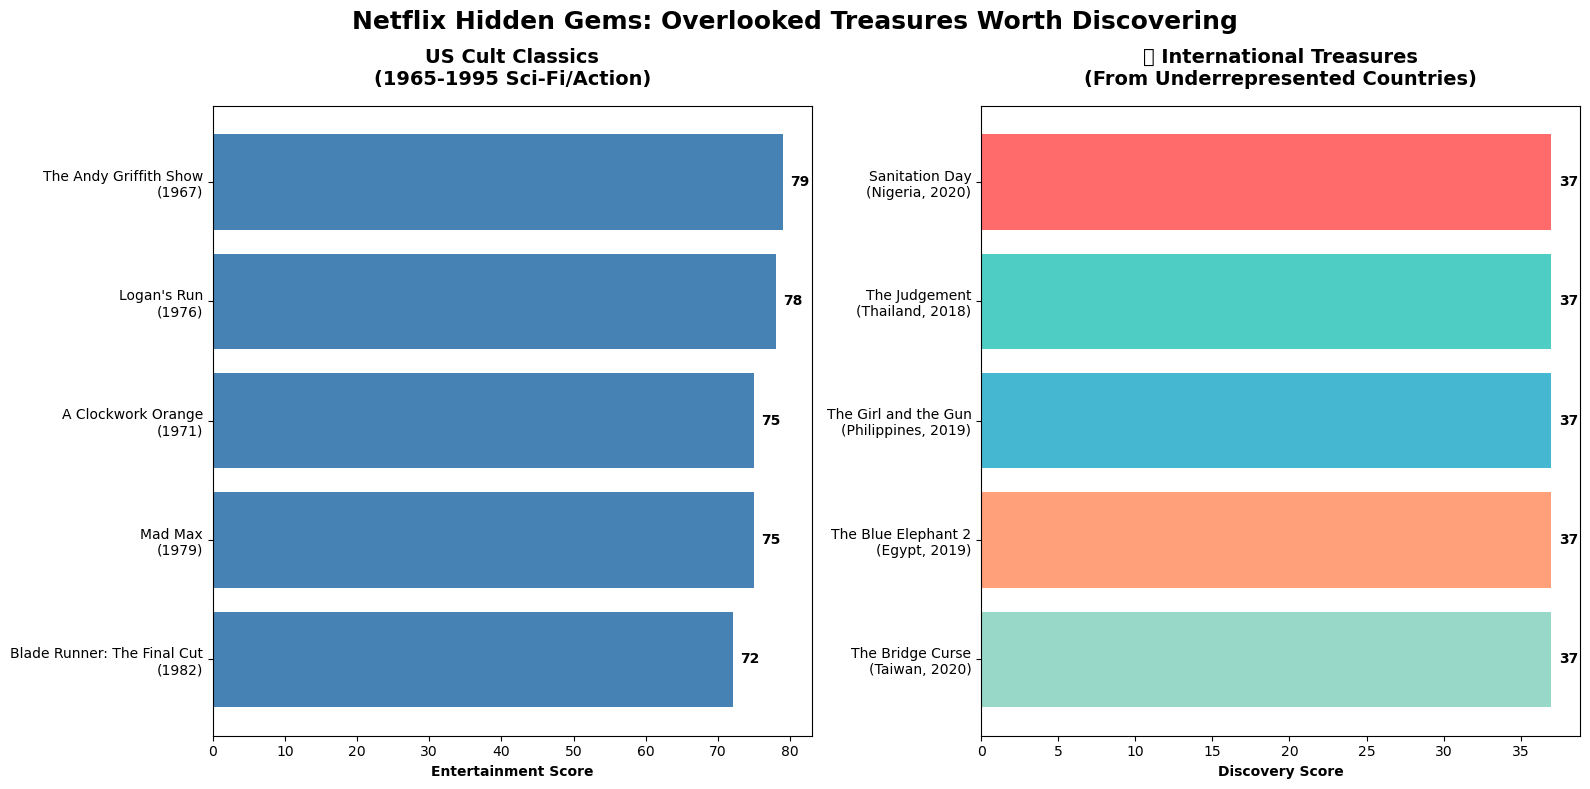


----------------------------------------------------------------------
NETFLIX HIDDEN GEMS GUIDE FOR CASUAL VIEWERS
----------------------------------------------------------------------

US CULT CLASSICS (1965-1995)
----------------------------------------------------------------------
• The Andy Griffith Show (1967)
  └─ Classic & Cult TV, TV Comedies

• Logan's Run (1976)
  └─ Action & Adventure, Cult Movies

• A Clockwork Orange (1971)
  └─ Dramas

• Mad Max (1979)
  └─ Action & Adventure, Cult Movies

• Blade Runner: The Final Cut (1982)
  └─ Action & Adventure, Cult Movies


INTERNATIONAL HIDDEN GEMS
----------------------------------------------------------------------
• Sanitation Day (2020) - Nigeria
  └─ Dramas, International Movies, Thrillers

• The Judgement (2018) - Thailand
  └─ Crime TV Shows, International TV Shows, TV Dramas

• The Girl and the Gun (2019) - Philippines
  └─ Dramas, International Movies, Thrillers

• The Blue Elephant 2 (2019) - Egypt
  └─ Horror Movie

In [32]:
# Create a visual presentation of hidden gems
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Netflix Hidden Gems: Overlooked Treasures Worth Discovering', fontsize=18, fontweight='bold', y=0.98)

# LEFT: US Cult Classics
us_display = wild_era_top_5.copy()
us_display['display_title'] = us_display.apply(lambda x: f"{x['title']}\n({int(x['release_year'])})", axis=1)

ax1 = axes[0]
bars1 = ax1.barh(range(len(us_display)), us_display['ent_score'], color='steelblue')
ax1.set_yticks(range(len(us_display)))
ax1.set_yticklabels(us_display['display_title'].tolist())
ax1.set_xlabel('Entertainment Score', fontweight='bold')
ax1.set_title('US Cult Classics\n(1965-1995 Sci-Fi/Action)', fontsize=14, fontweight='bold', pad=15)
ax1.invert_yaxis()

# Add score labels
for i, (idx, row) in enumerate(us_display.iterrows()):
    ax1.text(row['ent_score'] + 1, i, f"{row['ent_score']:.0f}", va='center', fontweight='bold')

# RIGHT: International Hidden Gems
intl_display = intl_top5.copy()
intl_display['display_title'] = intl_display.apply(lambda x: f"{x['title']}\n({x['primary_country']}, {int(x['release_year'])})", axis=1)

ax2 = axes[1]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
bars2 = ax2.barh(range(len(intl_display)), intl_display['discovery_score'], color=colors)
ax2.set_yticks(range(len(intl_display)))
ax2.set_yticklabels(intl_display['display_title'].tolist())
ax2.set_xlabel('Discovery Score', fontweight='bold')
ax2.set_title('🌍 International Treasures\n(From Underrepresented Countries)', fontsize=14, fontweight='bold', pad=15)
ax2.invert_yaxis()

# Add score labels
for i, (idx, row) in enumerate(intl_display.iterrows()):
    ax2.text(row['discovery_score'] + 0.5, i, f"{row['discovery_score']:.0f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print a user-friendly summary
print("\n" + "-"*70)
print("NETFLIX HIDDEN GEMS GUIDE FOR CASUAL VIEWERS")
print("-"*70)
print("\nUS CULT CLASSICS (1965-1995)")
print("-" * 70)
for idx, row in wild_era_top_5.iterrows():
    print(f"• {row['title']} ({int(row['release_year'])})")
    genres = row['listed_in'].replace('Classic Movies, ', '').replace('Cult Movies, ', '')
    print(f"  └─ {genres}\n")

print("\nINTERNATIONAL HIDDEN GEMS")
print("-" * 70)
for idx, row in intl_top5.iterrows():
    print(f"• {row['title']} ({int(row['release_year'])}) - {row['primary_country']}")
    print(f"  └─ {row['listed_in']}\n")

print("-"*70)
print("TIP: These titles rarely appear in Netflix recommendations")
print("   but offer unique perspectives and cinematic experiences!")
print("-"*70)

### Finding recently added old classics

In [33]:
# First, convert date_added to proper datetime format
gems_df_clean['date_added_dt'] = pd.to_datetime(gems_df_clean['date_added'], errors='coerce')
gems_df_clean['year_added'] = gems_df_clean['date_added_dt'].dt.year

# Filter for recently added old content
recent_old = gems_df_clean[
    (gems_df_clean['year_added'].isin([2020, 2021])) &  # Added recently
    (gems_df_clean['release_year'] < 2010)  # Released 10+ years ago
].copy()

print(f"Content added in 2020-2021 but released before 2010: {len(recent_old)} titles")
print(f"\nRelease year range: {recent_old['release_year'].min()} - {recent_old['release_year'].max()}")
print(f"\nContent types:\n{recent_old['type'].value_counts()}")

# Calculate the "time gap" - years between release and Netflix addition
recent_old['time_gap'] = recent_old['year_added'] - recent_old['release_year']

print(f"\nAverage time gap: {recent_old['time_gap'].mean():.1f} years")
print(f"Longest time gap: {recent_old['time_gap'].max()} years")

# Filter for quality content (Drama, Thriller, Classic, Independent, Documentary)
quality_genres = ['Drama', 'Thriller', 'Classic', 'Independent', 'Documentary', 'Cult', 'Crime']

recent_old['has_quality_genre'] = recent_old['listed_in'].apply(
    lambda x: any(genre in x for genre in quality_genres)
)

recent_old_quality = recent_old[recent_old['has_quality_genre']].copy()

print(f"\nWith quality genres: {len(recent_old_quality)} titles")
print("\nSample:")
print(recent_old_quality[['title', 'release_year', 'year_added', 'time_gap', 'listed_in']].head(10))

Content added in 2020-2021 but released before 2010: 509 titles

Release year range: 1945 - 2009

Content types:
type
Movie      463
TV Show     46
Name: count, dtype: int64

Average time gap: 21.6 years
Longest time gap: 76.0 years

With quality genres: 256 titles

Sample:
                  title  release_year  year_added  time_gap  \
7               Sankofa          1993      2021.0      28.0   
41                 Jaws          1975      2021.0      46.0   
42               Jaws 2          1978      2021.0      43.0   
43               Jaws 3          1983      2021.0      38.0   
44    Jaws: The Revenge          1987      2021.0      34.0   
48         Training Day          2001      2021.0      20.0   
114              Anjaam          1994      2021.0      27.0   
115         Bright Star          2009      2021.0      12.0   
122          In the Cut          2003      2021.0      18.0   
129  An Unfinished Life          2005      2021.0      16.0   

                               

In [34]:
# Create a "fresh classic" score
# Factors: time gap (older = better), quality genres, iconic status

recent_old_quality['fresh_classic_score'] = 0

# Base score: time gap (the longer they waited, the more "fresh" they are)
recent_old_quality['fresh_classic_score'] += recent_old_quality['time_gap'] * 2

# Bonus for specific prestigious genres
recent_old_quality['fresh_classic_score'] += recent_old_quality['listed_in'].str.contains('Classic', na=False) * 20
recent_old_quality['fresh_classic_score'] += recent_old_quality['listed_in'].str.contains('Cult', na=False) * 15
recent_old_quality['fresh_classic_score'] += recent_old_quality['listed_in'].str.contains('Thriller|Crime', na=False) * 10
recent_old_quality['fresh_classic_score'] += recent_old_quality['listed_in'].str.contains('Independent', na=False) * 8

# Bonus for movies (more likely to be rewatchable classics than old TV shows)
recent_old_quality['fresh_classic_score'] += (recent_old_quality['type'] == 'Movie').astype(int) * 5

# Get top 5
fresh_top5 = recent_old_quality.nlargest(5, 'fresh_classic_score')[
    ['title', 'release_year', 'year_added', 'time_gap', 'listed_in', 'fresh_classic_score']
]

print("-"*70)
print("TOP 5 RECENTLY ADDED OLD CLASSICS")
print("-"*70)
for idx, row in fresh_top5.iterrows():
    print(f"\n{row['title']} ({int(row['release_year'])})")
    print(f"   Added to Netflix: {int(row['year_added'])}")
    print(f"   Time Gap: {int(row['time_gap'])} years")
    print(f"   Genres: {row['listed_in']}")
    print(f"   Fresh Classic Score: {row['fresh_classic_score']:.0f}")
print("-"*70)

----------------------------------------------------------------------
TOP 5 RECENTLY ADDED OLD CLASSICS
----------------------------------------------------------------------

Scandal in Sorrento (1955)
   Added to Netflix: 2020
   Time Gap: 65 years
   Genres: Classic Movies, Comedies, Independent Movies
   Fresh Classic Score: 163

The Sign of Venus (1955)
   Added to Netflix: 2020
   Time Gap: 65 years
   Genres: Classic Movies, Comedies, Independent Movies
   Fresh Classic Score: 163

White Christmas (1954)
   Added to Netflix: 2020
   Time Gap: 66 years
   Genres: Children & Family Movies, Classic Movies, Comedies
   Fresh Classic Score: 157

The Blazing Sun (1954)
   Added to Netflix: 2020
   Time Gap: 66 years
   Genres: Classic Movies, Dramas, International Movies
   Fresh Classic Score: 157

Dark Waters (1956)
   Added to Netflix: 2020
   Time Gap: 64 years
   Genres: Classic Movies, Dramas, International Movies
   Fresh Classic Score: 153
------------------------------------

C:\Users\Paul\AppData\Local\Temp\ipykernel_12724\943614606.py:50: UserWarning: Glyph 128368 (\N{MANTELPIECE CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Paul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128368 (\N{MANTELPIECE CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


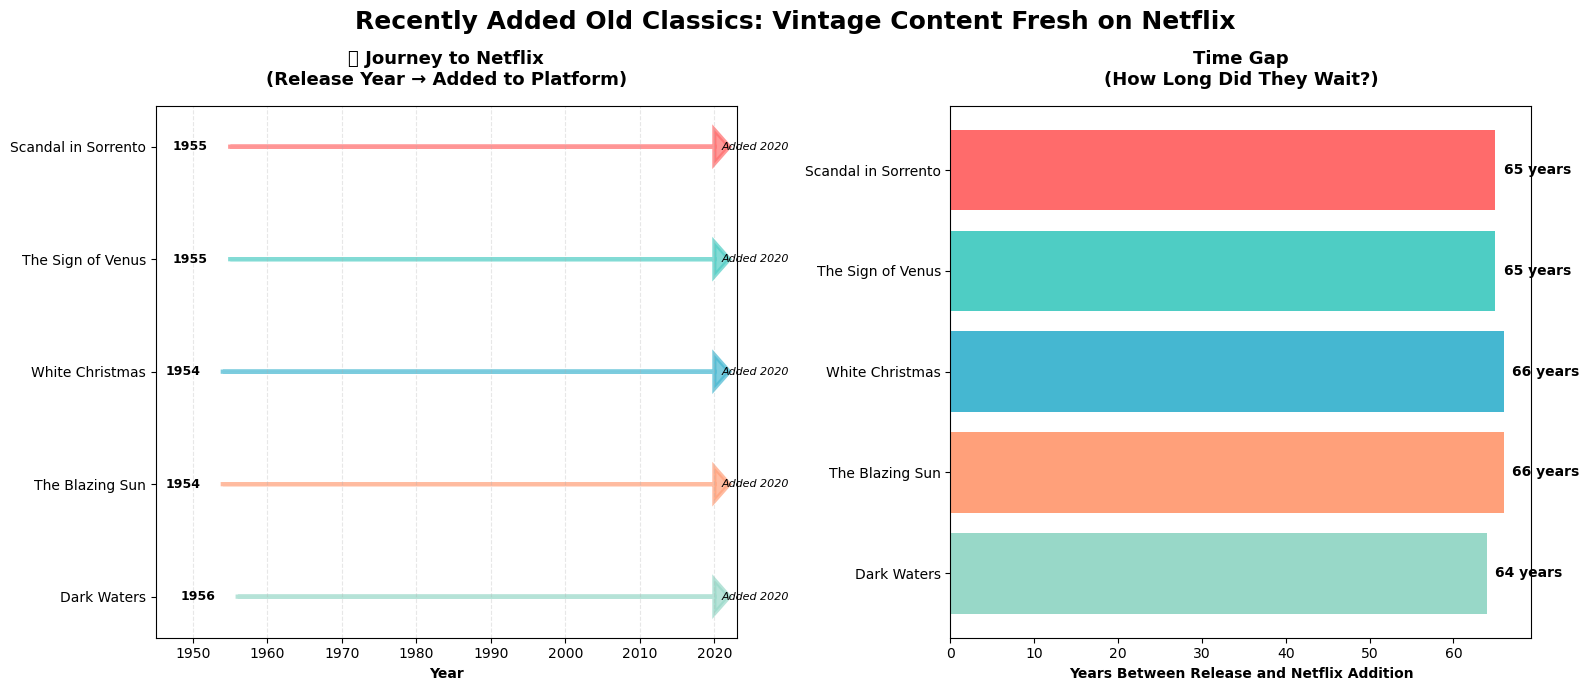


----------------------------------------------------------------------
RECENTLY ADDED OLD CLASSICS - VINTAGE GEMS FRESH ON NETFLIX
----------------------------------------------------------------------

These timeless classics waited decades to arrive on Netflix!
Added in 2020-2021, but released 64-66 years earlier.

----------------------------------------------------------------------
Scandal in Sorrento (1955)
Waited 65 years to reach Netflix
Classic Movies, Comedies, Independent Movies

The Sign of Venus (1955)
Waited 65 years to reach Netflix
Classic Movies, Comedies, Independent Movies

White Christmas (1954)
Waited 66 years to reach Netflix
Children & Family Movies, Classic Movies, Comedies

The Blazing Sun (1954)
Waited 66 years to reach Netflix
Classic Movies, Dramas, International Movies

Dark Waters (1956)
Waited 64 years to reach Netflix
Classic Movies, Dramas, International Movies

----------------------------------------------------------------------
WHY THESE MATTER:
  

In [35]:
# Create visualization for Recently Added Old Classics
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Recently Added Old Classics: Vintage Content Fresh on Netflix', fontsize=18, fontweight='bold', y=0.98)

# LEFT: Timeline showing time gap
ax1 = axes[0]

fresh_display = fresh_top5.copy()
fresh_display['display_title'] = fresh_display.apply(
    lambda x: f"{x['title'][:30]}..." if len(x['title']) > 30 else x['title'], axis=1)

# Create timeline visualization
y_positions = range(len(fresh_display))
colors_timeline = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

# Plot release year as starting point
for i, (idx, row) in enumerate(fresh_display.iterrows()):
    # Draw timeline arrow from release to addition
    ax1.arrow(row['release_year'], i, row['time_gap'], 0, 
             head_width=0.3, head_length=2, fc=colors_timeline[i], ec=colors_timeline[i], linewidth=3, alpha=0.7)
    
    # Add release year label
    ax1.text(row['release_year'] - 3, i, f"{int(row['release_year'])}", va='center', ha='right', fontweight='bold', fontsize=9)
    
    # Add "added" year label
    ax1.text(row['year_added'] + 1, i, f"Added {int(row['year_added'])}", va='center', ha='left', fontsize=8, style='italic')

ax1.set_yticks(y_positions)
ax1.set_yticklabels(fresh_display['display_title'].tolist())
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_title('🕰️ Journey to Netflix\n(Release Year → Added to Platform)', fontsize=13, fontweight='bold', pad=15)
ax1.set_xlim(1945, 2023)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.invert_yaxis()

# RIGHT: Time gap bars
ax2 = axes[1]

bars = ax2.barh(y_positions, fresh_display['time_gap'], color=colors_timeline)
ax2.set_yticks(y_positions)
ax2.set_yticklabels(fresh_display['display_title'].tolist())
ax2.set_xlabel('Years Between Release and Netflix Addition', fontweight='bold')
ax2.set_title('Time Gap\n(How Long Did They Wait?)', fontsize=13, fontweight='bold', pad=15)
ax2.invert_yaxis()

# Add time gap labels on bars
for i, (idx, row) in enumerate(fresh_display.iterrows()):
    ax2.text(row['time_gap'] + 1, i, f"{int(row['time_gap'])} years", va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Print user-friendly summary
print("\n" + "-"*70)
print("RECENTLY ADDED OLD CLASSICS - VINTAGE GEMS FRESH ON NETFLIX")
print("-"*70)
print("\nThese timeless classics waited decades to arrive on Netflix!")
print("Added in 2020-2021, but released 64-66 years earlier.\n")
print("-" * 70)

for idx, row in fresh_top5.iterrows():
    print(f"{row['title']} ({int(row['release_year'])})")
    print(f"Waited {int(row['time_gap'])} years to reach Netflix")
    print(f"{row['listed_in']}")
    print()

print("-"*70)
print("WHY THESE MATTER:")
print("   • Classics that stood the test of time")
print("   • Fresh to Netflix, so easy to miss in recommendations")
print("   • Cultural and historical significance")
print("   • Many are international cinema gems")
print("-"*70)

**Question 2: "How has Netflix's content changed over the years, and what does that mean for what I watch?"**

In [36]:
# Use our clean dataset and add some useful columns
evolution_df = gems_df_clean.copy()

# We already have year_added from previous analysis
print(f"Data range: {evolution_df['year_added'].min():.0f} - {evolution_df['year_added'].max():.0f}")

# Create age of content when added
evolution_df['content_age_when_added'] = evolution_df['year_added'] - evolution_df['release_year']

# Categorize content origin
def categorize_origin(country):
    if pd.isna(country):
        return 'Unknown'
    elif 'United States' in country:
        return 'US Content'
    else:
        return 'International'

evolution_df['origin'] = evolution_df['country'].apply(categorize_origin)

# Extract primary genre (first genre listed)
evolution_df['primary_genre'] = evolution_df['listed_in'].str.split(',').str[0].str.strip()

# Let's see what we have
print(f"\nTotal titles: {len(evolution_df)}")
print(f"\nOrigin breakdown:")
print(evolution_df['origin'].value_counts())
print(f"\nYears with data:")
print(evolution_df['year_added'].value_counts().sort_index())

Data range: 2008 - 2021

Total titles: 7967

Origin breakdown:
origin
International    4283
US Content       3684
Name: count, dtype: int64

Years with data:
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      70
2016.0     399
2017.0    1099
2018.0    1507
2019.0    1843
2020.0    1770
2021.0    1140
Name: count, dtype: int64


C:\Users\Paul\AppData\Local\Temp\ipykernel_12724\2938324227.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


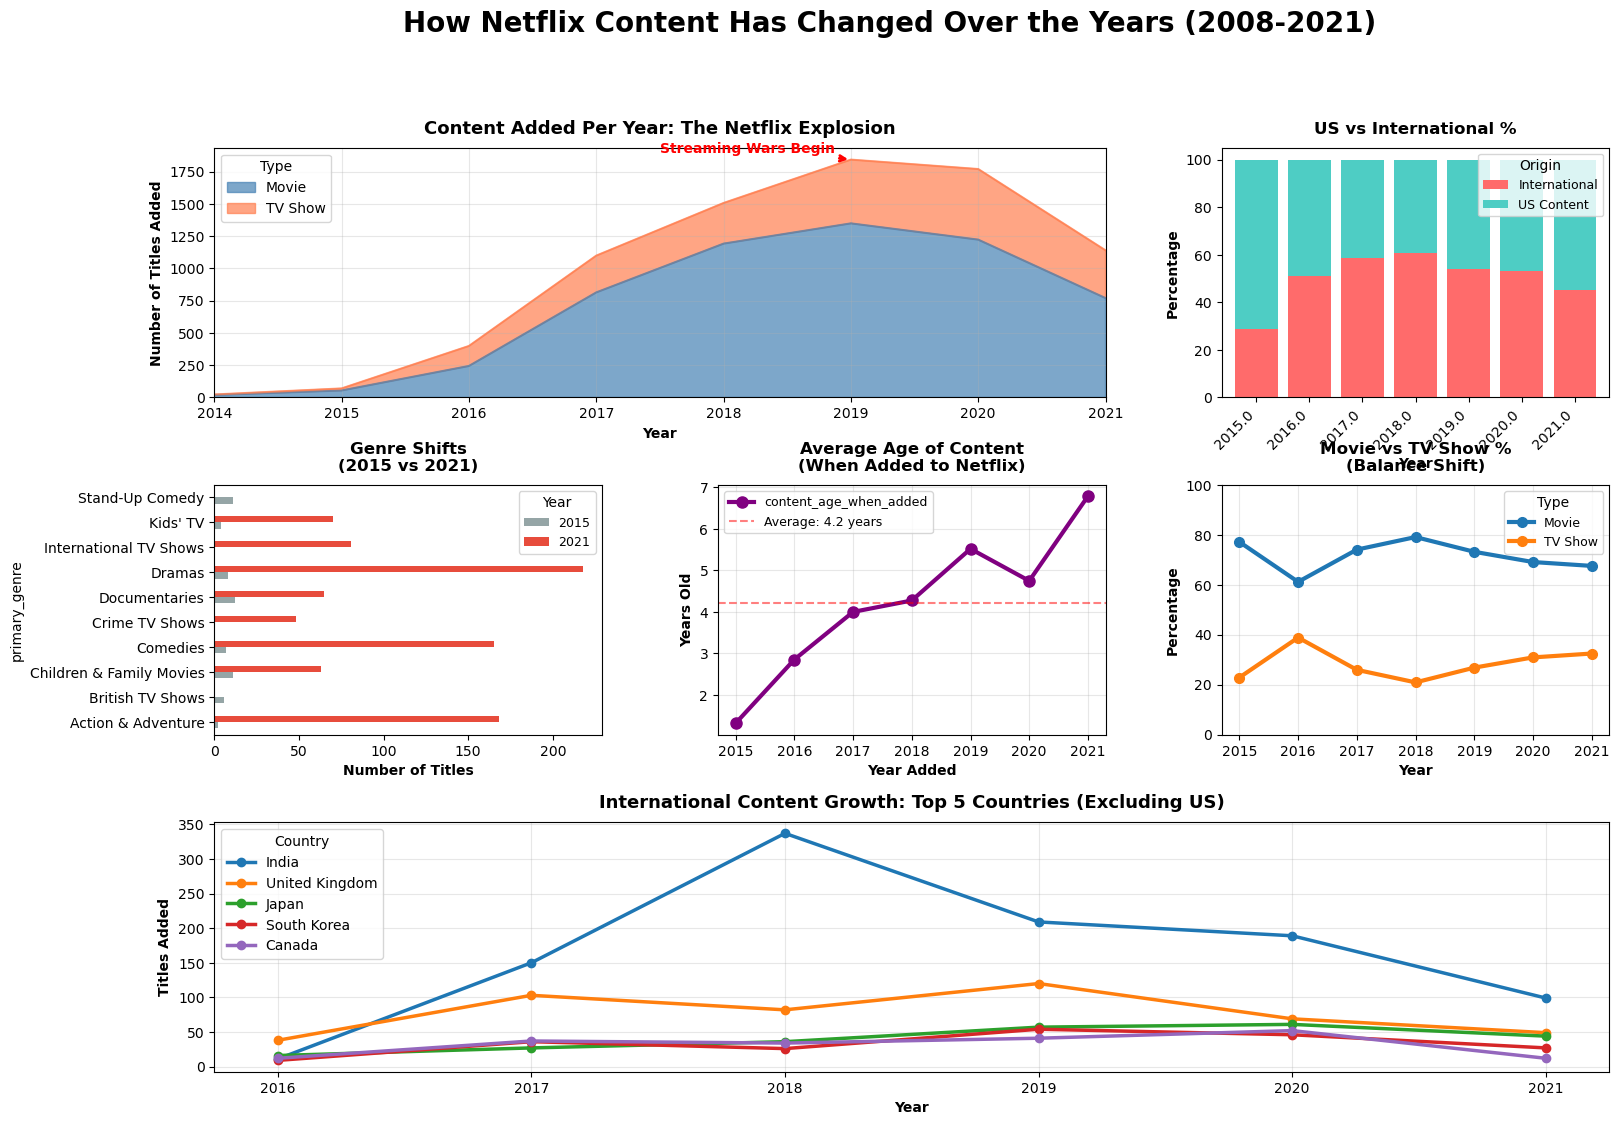


--------------------------------------------------------------------------------
INSIGHTS: HOW NETFLIX HAS CHANGED
--------------------------------------------------------------------------------


In [37]:
# "Netflix Evolution" dashboard
fig = plt.figure(figsize=(18, 12))
fig.suptitle('How Netflix Content Has Changed Over the Years (2008-2021)', 
             fontsize=20, fontweight='bold', y=0.995)

gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# 1. TOP LEFT: Content Volume Over Time
ax1 = fig.add_subplot(gs[0, :2])

yearly_data = evolution_df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
yearly_data.plot(kind='area', ax=ax1, color=['steelblue', 'coral'], alpha=0.7)

ax1.set_title('Content Added Per Year: The Netflix Explosion', fontsize=13, fontweight='bold', pad=10)
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('Number of Titles Added', fontweight='bold')
ax1.legend(title='Type', loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(2014, 2021)  # Focus on growth period

# Annotate key milestones
ax1.annotate('Streaming Wars Begin', xy=(2019, 1843), xytext=(2017.5, 1900),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),fontsize=10, fontweight='bold', color='red')

# 2. TOP RIGHT: US vs International Content Growth
ax2 = fig.add_subplot(gs[0, 2])

origin_yearly = evolution_df[evolution_df['year_added'] >= 2015].groupby(['year_added', 'origin']).size().unstack(fill_value=0)
origin_pct = origin_yearly.div(origin_yearly.sum(axis=1), axis=0) * 100

origin_pct.plot(kind='bar', stacked=True, ax=ax2, color=['#FF6B6B', '#4ECDC4'], width=0.8)
ax2.set_title('US vs International %', fontsize=12, fontweight='bold', pad=10)
ax2.set_ylabel('Percentage', fontweight='bold')
ax2.set_xlabel('Year', fontweight='bold')
ax2.legend(title='Origin', fontsize=9)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# 3. MIDDLE LEFT: Top Genres Evolution (2015 vs 2021)
ax3 = fig.add_subplot(gs[1, 0])

genres_2015 = evolution_df[evolution_df['year_added'] == 2015]['primary_genre'].value_counts().head(8)
genres_2021 = evolution_df[evolution_df['year_added'] == 2021]['primary_genre'].value_counts().head(8)

# Combine and compare
comparison_genres = pd.DataFrame({'2015': genres_2015, '2021': genres_2021}).fillna(0)

comparison_genres.plot(kind='barh', ax=ax3, color=['#95A5A6', '#E74C3C'])
ax3.set_title('Genre Shifts\n(2015 vs 2021)', fontsize=12, fontweight='bold', pad=10)
ax3.set_xlabel('Number of Titles', fontweight='bold')
ax3.legend(title='Year', fontsize=9)

# 4. MIDDLE CENTER: Content Age When Added
ax4 = fig.add_subplot(gs[1, 1])

age_by_year = evolution_df[evolution_df['year_added'] >= 2015].groupby('year_added')['content_age_when_added'].mean()
age_by_year.plot(kind='line', ax=ax4, marker='o', color='purple', linewidth=3, markersize=8)

ax4.set_title('Average Age of Content\n(When Added to Netflix)', fontsize=12, fontweight='bold', pad=10)
ax4.set_ylabel('Years Old', fontweight='bold')
ax4.set_xlabel('Year Added', fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.axhline(y=age_by_year.mean(), color='red', linestyle='--', alpha=0.5, label=f'Average: {age_by_year.mean():.1f} years')
ax4.legend(fontsize=9)

# 5. MIDDLE RIGHT: Movie vs TV Show Balance Over Time
ax5 = fig.add_subplot(gs[1, 2])

type_balance = evolution_df[evolution_df['year_added'] >= 2015].groupby(['year_added', 'type']).size().unstack()
type_balance_pct = type_balance.div(type_balance.sum(axis=1), axis=0) * 100

type_balance_pct.plot(kind='line', ax=ax5, marker='o', linewidth=3, markersize=7)
ax5.set_title('Movie vs TV Show %\n(Balance Shift)', fontsize=12, fontweight='bold', pad=10)
ax5.set_ylabel('Percentage', fontweight='bold')
ax5.set_xlabel('Year', fontweight='bold')
ax5.legend(title='Type', fontsize=9)
ax5.grid(True, alpha=0.3)
ax5.set_ylim(0, 100)

# 6. BOTTOM: Top International Countries Growth
ax6 = fig.add_subplot(gs[2, :])

# Get top international countries (excluding US)
intl_countries = evolution_df[
    (evolution_df['origin'] == 'International') & 
    (evolution_df['year_added'] >= 2016)
].copy()

# Extract primary country
intl_countries['primary_country'] = intl_countries['country'].str.split(',').str[0].str.strip()

# Get top 5 international producers
top_intl = intl_countries['primary_country'].value_counts().head(5).index

# Plot their growth over time
for country in top_intl:
    country_data = intl_countries[intl_countries['primary_country'] == country]
    yearly_counts = country_data.groupby('year_added').size()
    ax6.plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2.5, markersize=6, label=country)

ax6.set_title('International Content Growth: Top 5 Countries (Excluding US)', fontsize=13, fontweight='bold', pad=10)
ax6.set_xlabel('Year', fontweight='bold')
ax6.set_ylabel('Titles Added', fontweight='bold')
ax6.legend(title='Country', loc='upper left', fontsize=10)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "-"*80)
print("INSIGHTS: HOW NETFLIX HAS CHANGED")
print("-"*80)

**Question 3: Which countries produce the most content based on preferences**

In [38]:
import requests
import time

TMDB_API_KEY = 'e32e4eab6df5abdf13bfdc13e3c6749f'  

# Test with a known movie
test_url = f"https://api.themoviedb.org/3/search/movie?api_key={TMDB_API_KEY}&query=Jaws"

response = requests.get(test_url)
print(f"Status Code: {response.status_code}")

if response.status_code == 200:
    data = response.json()
    print("\n✅ API Connection Successful!")
    print(f"\nFound: {data['results'][0]['title']}")
    print(f"Release Date: {data['results'][0]['release_date']}")
    print(f"TMDb Rating: {data['results'][0]['vote_average']}/10")
    print(f"Vote Count: {data['results'][0]['vote_count']}")
else:
    print("❌ API connection failed. Check your API key.")

Status Code: 200

✅ API Connection Successful!

Found: Jaws
Release Date: 1975-06-20
TMDb Rating: 7.68/10
Vote Count: 11230


In [39]:
def fetch_tmdb_rating(title, release_year, content_type, api_key):
    """
    Fetch TMDb rating for a title.
    
    Parameters:
    - title: Movie or show title
    - release_year: Release year to help match correctly
    - content_type: 'Movie' or 'TV Show'
    - api_key: Your TMDb API key
    
    Returns:
    - Dictionary with rating info or None if not found
    """
    
    # Determine endpoint based on content type
    if content_type == 'Movie':
        search_url = f"https://api.themoviedb.org/3/search/movie"
    else:  # TV Show
        search_url = f"https://api.themoviedb.org/3/search/tv"
    
    # Make the API request
    params = {
        'api_key': api_key,
        'query': title,
        'year': release_year if content_type == 'Movie' else None
    }
    
    try:
        response = requests.get(search_url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            
            if data['results']:
                # Get the first (most relevant) result
                result = data['results'][0]
                
                return {
                    'tmdb_id': result['id'],
                    'rating': result['vote_average'],
                    'vote_count': result['vote_count'],
                    'matched_title': result.get('title') or result.get('name'),
                    'popularity': result.get('popularity', 0)
                }
        
        return None
    
    except Exception as e:
        print(f"Error fetching {title}: {e}")
        return None

# Test it on a few Netflix titles
print("Testing rating fetcher on sample titles:\n")

test_titles = [
    ('Jaws', 1975, 'Movie'),
    ('Blade Runner: The Final Cut', 1982, 'Movie'),
    ('Stranger Things', 2016, 'TV Show')
]

for title, year, ctype in test_titles:
    result = fetch_tmdb_rating(title, year, ctype, TMDB_API_KEY)
    if result:
        print(f"✅ {title} ({year})")
        print(f"   Rating: {result['rating']}/10 ({result['vote_count']} votes)")
        print(f"   Matched as: {result['matched_title']}\n")
    else:
        print(f"❌ {title} ({year}) - Not found\n")
    
    time.sleep(0.3)

Testing rating fetcher on sample titles:

✅ Jaws (1975)
   Rating: 7.68/10 (11230 votes)
   Matched as: Jaws

✅ Blade Runner: The Final Cut (1982)
   Rating: 7.941/10 (14586 votes)
   Matched as: Blade Runner

✅ Stranger Things (2016)
   Rating: 8.587/10 (20113 votes)
   Matched as: Stranger Things



In [40]:
# Step 1: Identify top 10 countries and filter our dataset
top_10_countries = evolution_df['country'].value_counts().head(10).index.tolist()

print("Top 10 Countries:")
for i, country in enumerate(top_10_countries, 1):
    count = (evolution_df['country'] == country).sum()
    print(f"{i}. {country}: {count} titles")

# Filter for these countries
top_countries_df = evolution_df[evolution_df['country'].isin(top_10_countries)].copy()

print(f"\nTotal titles from top 10 countries: {len(top_countries_df)}")
print(f"Estimated time to fetch ratings: {len(top_countries_df) * 0.3 / 60:.1f} minutes")

Top 10 Countries:
1. United States: 2812 titles
2. India: 972 titles
3. United Kingdom: 418 titles
4. Japan: 244 titles
5. South Korea: 199 titles
6. Canada: 181 titles
7. Spain: 145 titles
8. France: 124 titles
9. Mexico: 110 titles
10. Egypt: 106 titles

Total titles from top 10 countries: 5311
Estimated time to fetch ratings: 26.6 minutes


In [41]:
from tqdm import tqdm  # Progress bar library

def fetch_ratings_batch(df, api_key, delay=0.3):
    """
    Fetch TMDb ratings for a batch of titles with progress tracking.
    """
    results = []
    
    print(f"Fetching ratings for {len(df)} titles...")
    print("This will take approximately {:.1f} minutes\n".format(len(df) * delay / 60))
    
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Fetching ratings"):
        rating_info = fetch_tmdb_rating(
            title=row['title'],
            release_year=row['release_year'],
            content_type=row['type'],
            api_key=api_key
        )
        
        if rating_info:
            results.append({
                'index': idx,
                'title': row['title'],
                'tmdb_rating': rating_info['rating'],
                'vote_count': rating_info['vote_count'],
                'matched_title': rating_info['matched_title'],
                'popularity': rating_info['popularity']
            })
        else:
            results.append({
                'index': idx,
                'title': row['title'],
                'tmdb_rating': None,
                'vote_count': None,
                'matched_title': None,
                'popularity': None
            })
        
        time.sleep(delay)  # Rate limiting
    
    return pd.DataFrame(results)

# Start fetching!
print("Starting TMDb rating fetch...")
print("-" * 60)

ratings_df = fetch_ratings_batch(top_countries_df, TMDB_API_KEY, delay=0.3)

print("\n" + "-" * 60)
print("Fetching complete!")
print(f"\nResults:")
print(f"  Total titles processed: {len(ratings_df)}")
print(f"  Successfully matched: {ratings_df['tmdb_rating'].notna().sum()}")
print(f"  No match found: {ratings_df['tmdb_rating'].isna().sum()}")
print(f"  Success rate: {ratings_df['tmdb_rating'].notna().sum() / len(ratings_df) * 100:.1f}%")

🚀 Starting TMDb rating fetch...
Fetching ratings for 5311 titles...
This will take approximately 26.6 minutes



Fetching ratings: 100%|██████████| 5311/5311 [1:31:59<00:00,  1.04s/it]  


✅ Fetching complete!

Results:
  Total titles processed: 5311
  Successfully matched: 5062
  No match found: 249
  Success rate: 95.3%


In [42]:
# Merge the ratings back into our top countries dataframe
top_countries_df_rated = top_countries_df.merge(
    ratings_df[['index', 'tmdb_rating', 'vote_count', 'popularity']], 
    left_index=True, 
    right_on='index', 
    how='left'
)

# Drop the extra index column
top_countries_df_rated = top_countries_df_rated.drop('index', axis=1)

print("-"*70)
print("DATASET WITH RATINGS - SUMMARY")
print("-"*70)

print(f"\nTotal titles with ratings: {len(top_countries_df_rated)}")
print(f"\nRating Statistics:")
print(top_countries_df_rated['tmdb_rating'].describe())

print(f"\n\nSample of rated content:")
print(top_countries_df_rated[['title', 'country', 'type', 'tmdb_rating', 'vote_count']].head(10))

# Check quality distribution
print("\n\nQuality Categories:")
print(f"  High Quality (Rating ≥ 7.0): {(top_countries_df_rated['tmdb_rating'] >= 7.0).sum()} titles")
print(f"  Good Quality (6.0-6.9): {((top_countries_df_rated['tmdb_rating'] >= 6.0) & (top_countries_df_rated['tmdb_rating'] < 7.0)).sum()} titles")
print(f"  Average Quality (5.0-5.9): {((top_countries_df_rated['tmdb_rating'] >= 5.0) & (top_countries_df_rated['tmdb_rating'] < 6.0)).sum()} titles")
print(f"  Below Average (<5.0): {(top_countries_df_rated['tmdb_rating'] < 5.0).sum()} titles")
print(f"  No rating data: {top_countries_df_rated['tmdb_rating'].isna().sum()} titles")

print("\n" + "-"*70)

----------------------------------------------------------------------
DATASET WITH RATINGS - SUMMARY
----------------------------------------------------------------------

Total titles with ratings: 5311

Rating Statistics:
count    5062.000000
mean        6.362558
std         1.461304
min         0.000000
25%         5.800000
50%         6.572000
75%         7.233000
max        10.000000
Name: tmdb_rating, dtype: float64


Sample of rated content:
                           title         country     type  tmdb_rating  \
0           Dick Johnson Is Dead   United States    Movie        7.100   
1                   Kota Factory           India  TV Show        8.069   
2  The Great British Baking Show  United Kingdom  TV Show        8.400   
3                   The Starling   United States    Movie        6.900   
4              Dear White People   United States  TV Show        5.949   
5                Falsa identidad          Mexico  TV Show        7.558   
6                          

In [43]:
# Apply quality filters
# Remove titles with rating < 4.0 OR no rating data
quality_threshold = 4.0
min_votes = 10  # Also filter out titles with very few votes (unreliable ratings)

filtered_df = top_countries_df_rated[
    (top_countries_df_rated['tmdb_rating'] >= quality_threshold) & 
    (top_countries_df_rated['tmdb_rating'].notna()) &
    (top_countries_df_rated['vote_count'] >= min_votes)
].copy()

print("-"*70)
print("QUALITY FILTERING RESULTS")
print("-"*70)

print(f"\nBefore filtering: {len(top_countries_df_rated)} titles")
print(f"After filtering: {len(filtered_df)} titles")
print(f"Removed: {len(top_countries_df_rated) - len(filtered_df)} titles ({(len(top_countries_df_rated) - len(filtered_df))/len(top_countries_df_rated)*100:.1f}%)")

print(f"\n\nFiltered Dataset Quality:")
print(filtered_df['tmdb_rating'].describe())

print(f"\n\nQuality distribution after filtering:")
print(f"  Excellent (≥ 8.0): {(filtered_df['tmdb_rating'] >= 8.0).sum()} titles")
print(f"  Great (7.0-7.9): {((filtered_df['tmdb_rating'] >= 7.0) & (filtered_df['tmdb_rating'] < 8.0)).sum()} titles")
print(f"  Good (6.0-6.9): {((filtered_df['tmdb_rating'] >= 6.0) & (filtered_df['tmdb_rating'] < 7.0)).sum()} titles")
print(f"  Decent (5.0-5.9): {((filtered_df['tmdb_rating'] >= 5.0) & (filtered_df['tmdb_rating'] < 6.0)).sum()} titles")
print(f"  Watchable (4.0-4.9): {((filtered_df['tmdb_rating'] >= 4.0) & (filtered_df['tmdb_rating'] < 5.0)).sum()} titles")

# Show distribution by country
print(f"\n\nQuality content by country:")
country_quality = filtered_df.groupby('country').agg({
    'title': 'count',
    'tmdb_rating': 'mean'
}).round(2).sort_values('title', ascending=False)
print(country_quality)

print("-"*70)

----------------------------------------------------------------------
QUALITY FILTERING RESULTS
----------------------------------------------------------------------

Before filtering: 5311 titles
After filtering: 4032 titles
Removed: 1279 titles (24.1%)


Filtered Dataset Quality:
count    4032.000000
mean        6.620003
std         0.935466
min         4.000000
25%         6.000000
50%         6.667000
75%         7.292750
max         8.935000
Name: tmdb_rating, dtype: float64


Quality distribution after filtering:
  Excellent (≥ 8.0): 296 titles
  Great (7.0-7.9): 1174 titles
  Good (6.0-6.9): 1585 titles
  Decent (5.0-5.9): 794 titles
  Watchable (4.0-4.9): 183 titles


Quality content by country:
                title  tmdb_rating
country                           
United States    2420         6.56
India             473         6.30
United Kingdom    284         6.80
Japan             218         7.48
South Korea       145         7.42
Canada            131         6.40
Spain

In [44]:
def recommend_countries_by_preference(df, preferred_genres=None, content_type=None, 
                                     min_rating=6.0, top_n=5):
    """
    Recommend countries based on user preferences.
    
    Parameters:
    - df: DataFrame with ratings
    - preferred_genres: List of genres (e.g., ['Drama', 'Thriller'])
    - content_type: 'Movie', 'TV Show', or None (both)
    - min_rating: Minimum TMDb rating
    - top_n: Number of countries to recommend
    
    Returns:
    - DataFrame with country recommendations and stats
    """
    
    # Start with quality filter
    filtered = df[df['tmdb_rating'] >= min_rating].copy()
    
    # Filter by content type if specified
    if content_type:
        filtered = filtered[filtered['type'] == content_type]
    
    # Filter by genres if specified
    if preferred_genres:
        genre_pattern = '|'.join(preferred_genres)
        filtered = filtered[filtered['listed_in'].str.contains(genre_pattern, case=False, na=False)]
    
    # Calculate country statistics
    country_stats = filtered.groupby('country').agg({
        'title': 'count',
        'tmdb_rating': ['mean', 'median'],
        'vote_count': 'sum',
        'popularity': 'mean'
    }).round(2)
    
    country_stats.columns = ['title_count', 'avg_rating', 'median_rating', 'total_votes', 'avg_popularity']
    
    # Calculate a "recommendation score"
    # Factors: number of titles, average rating, popularity
    country_stats['recommendation_score'] = (
        (country_stats['title_count'] / country_stats['title_count'].max() * 40) +  # Quantity (40%)
        (country_stats['avg_rating'] / 10 * 40) +  # Quality (40%)
        (country_stats['avg_popularity'] / country_stats['avg_popularity'].max() * 20)  # Popularity (20%)
    )
    
    # Sort by recommendation score
    recommendations = country_stats.sort_values('recommendation_score', ascending=False).head(top_n)
    
    return recommendations, filtered

# Let's test with different user preferences!
print("-"*80)
print("COUNTRY RECOMMENDATIONS BY USER PREFERENCE")
print("-"*80)

# Example 1: User who loves crime thrillers
print("\n\nUSER PROFILE 1: Crime Thriller Fan")
print("-" * 80)
print("Preferences: Crime/Thriller genres, min rating 6.5")

rec1, data1 = recommend_countries_by_preference(
    filtered_df, 
    preferred_genres=['Crime', 'Thriller'],
    min_rating=6.5,
    top_n=5
)

print(f"\nFound {len(data1)} matching titles across countries")
print("\nTop 5 Recommended Countries:")
print(rec1[['title_count', 'avg_rating', 'recommendation_score']])

--------------------------------------------------------------------------------
COUNTRY RECOMMENDATIONS BY USER PREFERENCE
--------------------------------------------------------------------------------


USER PROFILE 1: Crime Thriller Fan
--------------------------------------------------------------------------------
Preferences: Crime/Thriller genres, min rating 6.5

Found 314 matching titles across countries

Top 5 Recommended Countries:
                title_count  avg_rating  recommendation_score
country                                                      
United States           155        7.30             74.079660
South Korea              23        7.54             56.095484
United Kingdom           30        7.28             39.495253
Japan                    16        7.62             38.812273
Mexico                   20        7.29             36.517295


In [45]:
# Create different user profiles
profiles = []

# Profile 2: Rom-Com Lover
print("\n\nUSER PROFILE 2: Romantic Comedy Lover")
print("-" * 80)
print("Preferences: Romance/Comedy genres, Movies only, min rating 6.0")

rec2, data2 = recommend_countries_by_preference(
    filtered_df,
    preferred_genres=['Romance', 'Romantic', 'Comedies'],
    content_type='Movie',
    min_rating=6.0,
    top_n=5
)
print(f"\nFound {len(data2)} matching titles")
print("\nTop 5 Countries:")
print(rec2[['title_count', 'avg_rating', 'recommendation_score']])

# Profile 3: Documentary Enthusiast  
print("\n\nUSER PROFILE 3: Documentary Enthusiast")
print("-" * 80)
print("Preferences: Documentaries, min rating 7.0")

rec3, data3 = recommend_countries_by_preference(
    filtered_df,
    preferred_genres=['Documentary', 'Documentaries'],
    min_rating=7.0,
    top_n=5
)
print(f"\nFound {len(data3)} matching titles")
print("\nTop 5 Countries:")
print(rec3[['title_count', 'avg_rating', 'recommendation_score']])

# Profile 4: Action/Adventure Fan
print("\n\nUSER PROFILE 4: Action/Adventure Fan")
print("-" * 80)
print("Preferences: Action & Adventure, min rating 6.5")

rec4, data4 = recommend_countries_by_preference(
    filtered_df,
    preferred_genres=['Action', 'Adventure'],
    min_rating=6.5,
    top_n=5
)
print(f"\nFound {len(data4)} matching titles")
print("\nTop 5 Countries:")
print(rec4[['title_count', 'avg_rating', 'recommendation_score']])

# Profile 5: International Drama Lover
print("\n\nUSER PROFILE 5: International Drama Lover")
print("-" * 80)
print("Preferences: Dramas, International content, TV Shows, min rating 7.0")

rec5, data5 = recommend_countries_by_preference(
    filtered_df,
    preferred_genres=['Drama', 'International'],
    content_type='TV Show',
    min_rating=7.0,
    top_n=5
)
print(f"\nFound {len(data5)} matching titles")
print("\nTop 5 Countries:")
print(rec5[['title_count', 'avg_rating', 'recommendation_score']])

print("\n" + "-"*80)



USER PROFILE 2: Romantic Comedy Lover
--------------------------------------------------------------------------------
Preferences: Romance/Comedy genres, Movies only, min rating 6.0

Found 570 matching titles

Top 5 Countries:
                title_count  avg_rating  recommendation_score
country                                                      
United States           342        6.63             86.520000
India                   135        6.77             49.288572
United Kingdom           19        7.06             48.605458
Japan                     2        7.34             44.341929
France                    8        6.70             41.157423


USER PROFILE 3: Documentary Enthusiast
--------------------------------------------------------------------------------
Preferences: Documentaries, min rating 7.0

Found 188 matching titles

Top 5 Countries:
                title_count  avg_rating  recommendation_score
country                                                      
Un

C:\Users\Paul\AppData\Local\Temp\ipykernel_12724\1135463131.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


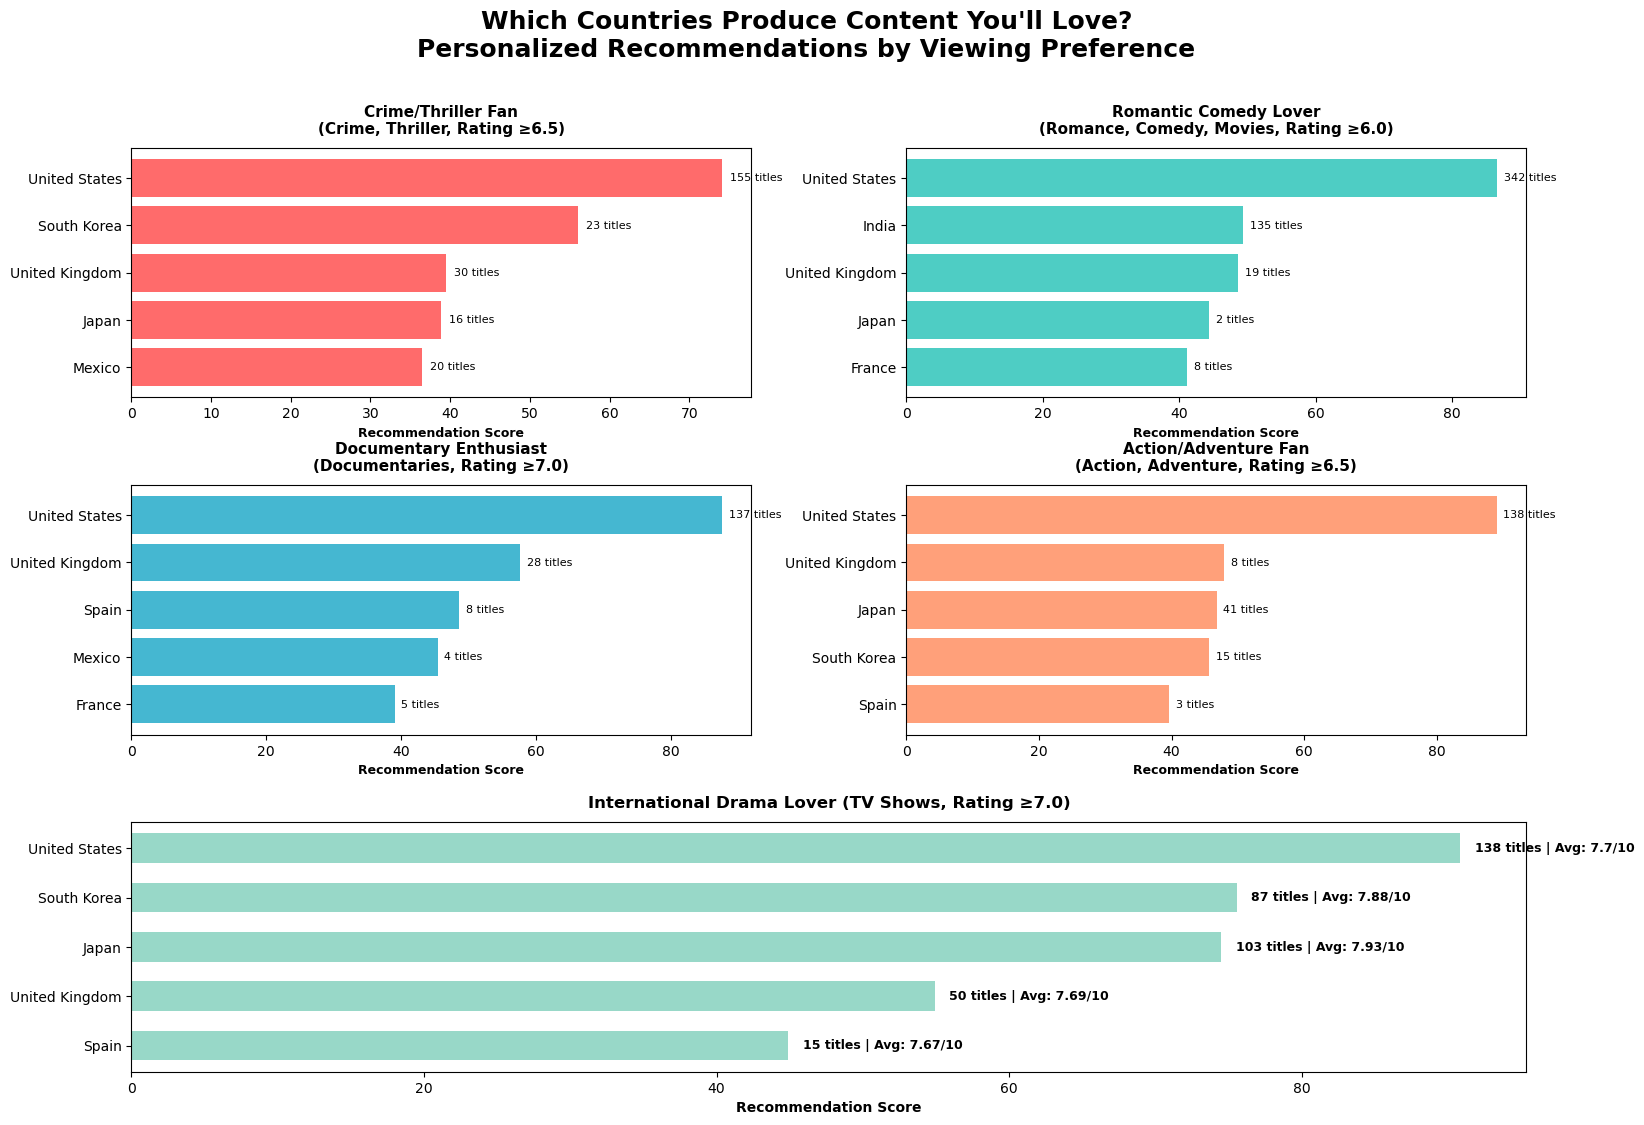


--------------------------------------------------------------------------------
COUNTRY RECOMMENDATIONS BY PREFERENCE
--------------------------------------------------------------------------------

COUNTRY SPECIALIZATIONS:
  • United States: Dominates in volume across all genres
  • South Korea: Exceptional quality in crime thrillers & dramas (7.5+ avg)
  • Japan: Strong in action and international dramas (7.9+ avg)
  • India: #2 for romantic comedies (135 titles)
  • Mexico: Highest documentary ratings (7.88 avg)
  • United Kingdom: Consistent quality across genres (7.0+ avg)

RECOMMENDATION:
  Based on your preferences, explore content from countries with HIGH
  recommendation scores - they balance quantity, quality, and popularity!
--------------------------------------------------------------------------------


In [48]:
# Create a multi-panel visualization for country recommendations
fig = plt.figure(figsize=(18, 12))
fig.suptitle('Which Countries Produce Content You\'ll Love?\nPersonalized Recommendations by Viewing Preference', 
             fontsize=18, fontweight='bold', y=0.995)

gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.25)

# Store all recommendations
all_recs = {
    'Crime/Thriller': rec1,
    'Rom-Com': rec2,
    'Documentary': rec3,
    'Action': rec4,
    'Int\'l Drama': rec5
}

colors_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

# 1. TOP LEFT: Crime/Thriller Recommendations
ax1 = fig.add_subplot(gs[0, 0])
rec1_plot = rec1.head(5)['recommendation_score']
bars1 = ax1.barh(range(len(rec1_plot)), rec1_plot, color=colors_palette[0])
ax1.set_yticks(range(len(rec1_plot)))
ax1.set_yticklabels(rec1_plot.index)
ax1.set_xlabel('Recommendation Score', fontweight='bold', fontsize=9)
ax1.set_title('Crime/Thriller Fan\n(Crime, Thriller, Rating ≥6.5)', 
             fontsize=11, fontweight='bold', pad=10)
ax1.invert_yaxis()

# Add count labels
for i, (country, score) in enumerate(rec1_plot.items()):
    title_count = rec1.loc[country, 'title_count']
    ax1.text(score + 1, i, f"{int(title_count)} titles", va='center', fontsize=8)

# 2. TOP RIGHT: Rom-Com Lover
ax2 = fig.add_subplot(gs[0, 1])
rec2_plot = rec2.head(5)['recommendation_score']
bars2 = ax2.barh(range(len(rec2_plot)), rec2_plot, color=colors_palette[1])
ax2.set_yticks(range(len(rec2_plot)))
ax2.set_yticklabels(rec2_plot.index)
ax2.set_xlabel('Recommendation Score', fontweight='bold', fontsize=9)
ax2.set_title('Romantic Comedy Lover\n(Romance, Comedy, Movies, Rating ≥6.0)', 
             fontsize=11, fontweight='bold', pad=10)
ax2.invert_yaxis()

for i, (country, score) in enumerate(rec2_plot.items()):
    title_count = rec2.loc[country, 'title_count']
    ax2.text(score + 1, i, f"{int(title_count)} titles", va='center', fontsize=8)

# 3. MIDDLE LEFT: Documentary Enthusiast
ax3 = fig.add_subplot(gs[1, 0])
rec3_plot = rec3.head(5)['recommendation_score']
bars3 = ax3.barh(range(len(rec3_plot)), rec3_plot, color=colors_palette[2])
ax3.set_yticks(range(len(rec3_plot)))
ax3.set_yticklabels(rec3_plot.index)
ax3.set_xlabel('Recommendation Score', fontweight='bold', fontsize=9)
ax3.set_title('Documentary Enthusiast\n(Documentaries, Rating ≥7.0)', 
             fontsize=11, fontweight='bold', pad=10)
ax3.invert_yaxis()

for i, (country, score) in enumerate(rec3_plot.items()):
    title_count = rec3.loc[country, 'title_count']
    ax3.text(score + 1, i, f"{int(title_count)} titles", va='center', fontsize=8)

# 4. MIDDLE RIGHT: Action/Adventure Fan
ax4 = fig.add_subplot(gs[1, 1])
rec4_plot = rec4.head(5)['recommendation_score']
bars4 = ax4.barh(range(len(rec4_plot)), rec4_plot, color=colors_palette[3])
ax4.set_yticks(range(len(rec4_plot)))
ax4.set_yticklabels(rec4_plot.index)
ax4.set_xlabel('Recommendation Score', fontweight='bold', fontsize=9)
ax4.set_title('Action/Adventure Fan\n(Action, Adventure, Rating ≥6.5)', 
             fontsize=11, fontweight='bold', pad=10)
ax4.invert_yaxis()

for i, (country, score) in enumerate(rec4_plot.items()):
    title_count = rec4.loc[country, 'title_count']
    ax4.text(score + 1, i, f"{int(title_count)} titles", va='center', fontsize=8)

# 5. BOTTOM: International Drama Lover (LARGER)
ax5 = fig.add_subplot(gs[2, :])
rec5_plot = rec5.head(5)['recommendation_score']
bars5 = ax5.barh(range(len(rec5_plot)), rec5_plot, color=colors_palette[4], height=0.6)
ax5.set_yticks(range(len(rec5_plot)))
ax5.set_yticklabels(rec5_plot.index)
ax5.set_xlabel('Recommendation Score', fontweight='bold', fontsize=10)
ax5.set_title('International Drama Lover (TV Shows, Rating ≥7.0)', 
             fontsize=12, fontweight='bold', pad=10)
ax5.invert_yaxis()

for i, (country, score) in enumerate(rec5_plot.items()):
    title_count = rec5.loc[country, 'title_count']
    avg_rating = rec5.loc[country, 'avg_rating']
    ax5.text(score + 1, i, f"{int(title_count)} titles | Avg: {avg_rating}/10", 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary insights
print("\n" + "-"*80)
print("COUNTRY RECOMMENDATIONS BY PREFERENCE")
print("-"*80)
print("\nCOUNTRY SPECIALIZATIONS:")
print("  • United States: Dominates in volume across all genres")
print("  • South Korea: Exceptional quality in crime thrillers & dramas (7.5+ avg)")
print("  • Japan: Strong in action and international dramas (7.9+ avg)")
print("  • India: #2 for romantic comedies (135 titles)")
print("  • Mexico: Highest documentary ratings (7.88 avg)")
print("  • United Kingdom: Consistent quality across genres (7.0+ avg)")
print("\nRECOMMENDATION:")
print("  Based on your preferences, explore content from countries with HIGH")
print("  recommendation scores - they balance quantity, quality, and popularity!")
print("-"*80)